In [5]:
# 한글 폰트 깨지는것을 막아줌 (mac)
from matplotlib import font_manager, rc
font_path = '/Users/ijung-yun/Library/Fonts/뫼비우스 Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ijung-yun\\Library\\Fonts\\뫼비우스 Bold.ttf'

In [224]:
# 한글 폰트 깨지는것을 막아줌 (windows)
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/H2GTRM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## 데이터 로드

In [229]:
# 최종 가공한 데이터셋 로드(git hub 기준)
df = pd.read_csv('dataset/법정동과 편의시설_1020.csv', index_col=0)
df

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,세탁업,영화상영관,제과점영업,체력단련장업,...,119안전센터,공원수,노래방수,당구장,도서관,박물관미술관,우체국,음식점수,카페수,패스트푸드
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,16.0,8.0,0.0
1,신교동,0,0,0,0,0,2,0,1,0,...,1,0,0,1,0.0,0.0,0.0,10.0,1.0,0.0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,4.0,1.0,0.0
3,효자동,0,2,1,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,16.0,5.0,0.0
4,창성동,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,23.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,9,0,8,8,...,0,1,15,5,1.0,0.0,0.0,187.0,34.0,3.0
461,암사동,1,29,3,8,3,23,0,22,16,...,1,1,29,12,1.0,0.0,0.0,411.0,69.0,9.0
462,성내동,1,54,3,14,4,35,19,34,30,...,1,0,60,25,1.0,0.0,0.0,982.0,142.0,20.0
463,천호동,3,51,3,7,3,47,6,37,14,...,1,0,44,22,2.0,0.0,0.0,1001.0,136.0,28.0


In [230]:
df_temp = df.copy()

In [ ]:
# 최종 가공한 데이터셋 로드 (정윤님)
df = pd.read_excel('../Dataset/법정동과 편의시설.xlsx')
df.head()

### df : default dataset

In [189]:
# 연관 컬럼 묶어주기 (default)
df['의료'] = df['병원'] + df['의원'] + df['약국']
df['치안'] = df['치안센터'] + df['경찰서'] + df['119안전센터']
df['생활편의시설'] = df['목욕장업'] + df['세탁업']
df['여가'] = df['골프연습장업'] + df['체력단련장업'] + df['당구장'] + df['노래방수'] + df['영화상영관']
df['교통'] = df['지하철역'] + df['버스정류소']
df['쇼핑'] = df['대규모점포'] + df['서점'] + df['구분없음'] + df['대형마트'] + df['백화점'] + df['복합쇼핑몰'] + df['쇼핑센터'] + df['시장']  + df['제과점영업']
df 

,Unnamed: 0,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,...,공원수,노래방수,당구장,음식점수,의료,치안,생활편의시설,여가,교통,쇼핑
0,0,청운동,0,7,2,0,0,0,0,0,...,0,0,0,16,0,0,0,0,7,2
1,1,신교동,0,0,0,0,0,0,2,0,...,0,0,1,11,1,1,2,1,0,1
2,2,궁정동,0,1,0,0,0,0,0,0,...,0,0,0,4,0,1,0,0,1,0
3,3,효자동,0,2,1,0,0,0,0,0,...,0,0,0,16,0,0,0,0,2,2
4,4,창성동,0,2,2,0,0,0,0,0,...,0,0,0,23,4,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,490,둔촌동,3,37,1,6,2,2,9,0,...,1,15,5,190,34,2,11,34,40,9
461,491,암사동,1,29,3,8,3,2,23,0,...,1,29,12,422,92,3,26,65,30,26
462,492,성내동,1,54,3,14,4,4,35,19,...,0,60,25,994,170,3,39,148,55,40
463,493,천호동,3,51,3,7,3,5,47,6,...,0,44,22,1024,205,4,50,93,54,46


In [190]:
# 필요한 컬럼값만 추출
df = df[['법정동명', '의료', '치안', '쇼핑', '생활편의시설', '여가', '교통', '공원수', '음식점수']]
df

,법정동명,의료,치안,쇼핑,생활편의시설,여가,교통,공원수,음식점수
0,청운동,0,0,2,0,0,7,0,16
1,신교동,1,1,1,2,1,0,0,11
2,궁정동,0,1,0,0,0,1,0,4
3,효자동,0,0,2,0,0,2,0,16
4,창성동,4,0,2,0,0,2,0,23
...,...,...,...,...,...,...,...,...,...
460,둔촌동,34,2,9,11,34,40,1,190
461,암사동,92,3,26,26,65,30,1,422
462,성내동,170,3,40,39,148,55,0,994
463,천호동,205,4,46,50,93,54,0,1024


In [11]:
# 분포
df.describe()

,의료,치안,쇼핑,생활편의시설,여가,교통,공원수,음식점수
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,42.230108,1.129032,11.227957,10.045161,30.021505,24.533333,1.122581,268.623656
std,84.166225,1.723480,17.270530,17.157740,53.893609,36.636369,1.968509,420.502289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,2.000000,3.000000,0.000000,35.000000
50%,11.000000,1.000000,4.000000,3.000000,7.000000,8.000000,0.000000,102.000000
75%,46.000000,1.000000,14.000000,13.000000,31.000000,34.000000,1.000000,318.000000
max,805.000000,11.000000,100.000000,138.000000,359.000000,274.000000,12.000000,3089.000000


### df_1 : 컬럼 5개로 최소화

In [12]:
# 연관 컬럼 묶어주기 (df_1 / 컬럼 5개)

# 복지점수 = 의료 + 치안
# 삶의 질 = 생활편의시설 + 여가 + 공원
# 교통
# 음식점
# 쇼핑

# 석유판매 드랍
df_1 = pd.DataFrame()
df_1['법정동명'] = df['법정동명']
df_1['복지점수'] = df['의료'] + df['치안']
df_1['삶의질'] = df['생활편의시설'] + df['여가'] + df['공원수']
df_1['교통'] = df['교통']
df_1['음식점수'] = df['음식점수']
df_1['쇼핑'] = df['쇼핑']
df_1





,법정동명,복지점수,삶의질,교통,음식점수,쇼핑
0,청운동,0,0,7,16,2
1,신교동,2,3,0,11,1
2,궁정동,1,0,1,4,0
3,효자동,0,0,2,16,2
4,창성동,4,0,2,23,2
...,...,...,...,...,...,...
460,둔촌동,36,46,40,190,9
461,암사동,95,92,30,422,26
462,성내동,173,187,55,994,40
463,천호동,209,143,54,1024,46


In [13]:
df_1.drop(['법정동명'], axis=1, inplace=True)
df_1.describe()

,복지점수,삶의질,교통,음식점수,쇼핑
count,465.00000,465.000000,465.000000,465.000000,465.000000
mean,43.35914,41.189247,24.533333,268.623656,11.227957
std,85.35384,70.978921,36.636369,420.502289,17.270530
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,3.000000,3.000000,35.000000,1.000000
50%,11.00000,9.000000,8.000000,102.000000,4.000000
75%,47.00000,48.000000,34.000000,318.000000,14.000000
max,808.00000,442.000000,274.000000,3089.000000,100.000000


### df_2 : 컬럼 7개로 최적화

In [14]:
# 연관 컬럼 묶어주기 (df_2 / 컬럼 7개)

# 의료
# 생활복지 = 치안 + 공원수
# 생활편의시설
# 여가
# 교통
# 음식점
# 쇼핑

# 석유판매 드랍
df_2 = pd.DataFrame()
df_2['법정동명'] = df['법정동명']
df_2['의료'] = df['의료']
df_2['생활복지'] = df['치안'] + df['공원수']
df_2['생활편의시설'] = df['생활편의시설']
df_2['여가'] = df['여가']
df_2['교통'] = df['교통']
df_2['음식점수'] = df['음식점수']
df_2['쇼핑'] = df['쇼핑']
df_2


,법정동명,의료,생활복지,생활편의시설,여가,교통,음식점수,쇼핑
0,청운동,0,0,0,0,7,16,2
1,신교동,1,1,2,1,0,11,1
2,궁정동,0,1,0,0,1,4,0
3,효자동,0,0,0,0,2,16,2
4,창성동,4,0,0,0,2,23,2
...,...,...,...,...,...,...,...,...
460,둔촌동,34,3,11,34,40,190,9
461,암사동,92,4,26,65,30,422,26
462,성내동,170,3,39,148,55,994,40
463,천호동,205,4,50,93,54,1024,46


In [15]:
df_2.drop(['법정동명'], axis=1, inplace=True)
df_2.describe()

,의료,생활복지,생활편의시설,여가,교통,음식점수,쇼핑
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,42.230108,2.251613,10.045161,30.021505,24.533333,268.623656,11.227957
std,84.166225,3.138870,17.157740,53.893609,36.636369,420.502289,17.270530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,2.000000,3.000000,35.000000,1.000000
50%,11.000000,1.000000,3.000000,7.000000,8.000000,102.000000,4.000000
75%,46.000000,3.000000,13.000000,31.000000,34.000000,318.000000,14.000000
max,805.000000,16.000000,138.000000,359.000000,274.000000,3089.000000,100.000000


### df_3 : 컬럼 8개로 최적화

In [208]:
# 연관 컬럼 묶어주기 (df_3 / 컬럼 8개)

# 의료
# 생활복지 = 치안 + 공원수
# 생활편의시설
# 여가
# 교통
# 음식점
# 쇼핑

# 석유판매 드랍
df_3 = pd.DataFrame()
df_3['법정동명'] = df['법정동명']
df_3['의료'] = df['의료']
df_3['생활복지'] = df['치안'] + df['공원수']
df_3['생활편의시설'] = df['생활편의시설']
df_3['여가'] = df['여가']
df_3['교통'] = df['교통']
df_3['음식점수'] = df['음식점수']
df_3['쇼핑'] = df_temp['백화점'] + df_temp['복합쇼핑몰'] + df_temp['쇼핑센터'] + df_temp['서점']
df_3['장보기시설'] = df_temp['대규모점포'] + df_temp['구분없음'] + df_temp['대형마트'] + df_temp['시장']  + df_temp['제과점영업']
df_3





,법정동명,의료,생활복지,생활편의시설,여가,교통,음식점수,쇼핑,장보기시설
0,청운동,0,0,0,0,7,16,2,0
1,신교동,1,1,2,1,0,11,0,1
2,궁정동,0,1,0,0,1,4,0,0
3,효자동,0,0,0,0,2,16,1,1
4,창성동,4,0,0,0,2,23,2,0
...,...,...,...,...,...,...,...,...,...
460,둔촌동,34,3,11,34,40,190,1,8
461,암사동,92,4,26,65,30,422,3,23
462,성내동,170,3,39,148,55,994,3,37
463,천호동,205,4,50,93,54,1024,4,42


In [209]:
df_3.drop(['법정동명'], axis=1, inplace=True)
df_3.describe()

,의료,생활복지,생활편의시설,여가,교통,음식점수,쇼핑,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,42.230108,2.251613,10.045161,30.021505,24.533333,268.623656,1.503226,9.724731
std,84.166225,3.138870,17.157740,53.893609,36.636369,420.502289,2.705456,15.199022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,2.000000,3.000000,35.000000,0.000000,1.000000
50%,11.000000,1.000000,3.000000,7.000000,8.000000,102.000000,0.000000,3.000000
75%,46.000000,3.000000,13.000000,31.000000,34.000000,318.000000,2.000000,12.000000
max,805.000000,16.000000,138.000000,359.000000,274.000000,3089.000000,20.000000,93.000000


## 데이터 전처리

### df_x

In [16]:
# 데이터 전처리 후 df_x로 지정
df_x = pd.DataFrame()
for i in ['음식점수','의료', '생활편의시설', '여가', '교통']:
    df_x[i] = pd.qcut(df[i], 4, labels=[0, 1, 2, 3])
    df_x[i] = df_x[i].astype('int64')
for i in ['공원수','쇼핑']:
    df_x[i] = np.digitize(df[i], [1])
    
    
df_x['치안'] = df['치안'].copy()
df_x.loc[(df_x['치안'] == 3), '치안'] = 2
df_x.loc[(df_x['치안'] >= 4), '치안'] = 3

In [17]:
# df_x 분포
df_x.describe()

,음식점수,의료,생활편의시설,여가,교통,공원수,쇼핑,치안
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,1.492473,1.479570,1.277419,1.408602,1.406452,0.417204,0.836559,0.836559
std,1.122097,1.123856,1.220526,1.161863,1.176440,0.493628,0.370166,0.973328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000


In [18]:
corr = df_x.corr()

<AxesSubplot: >

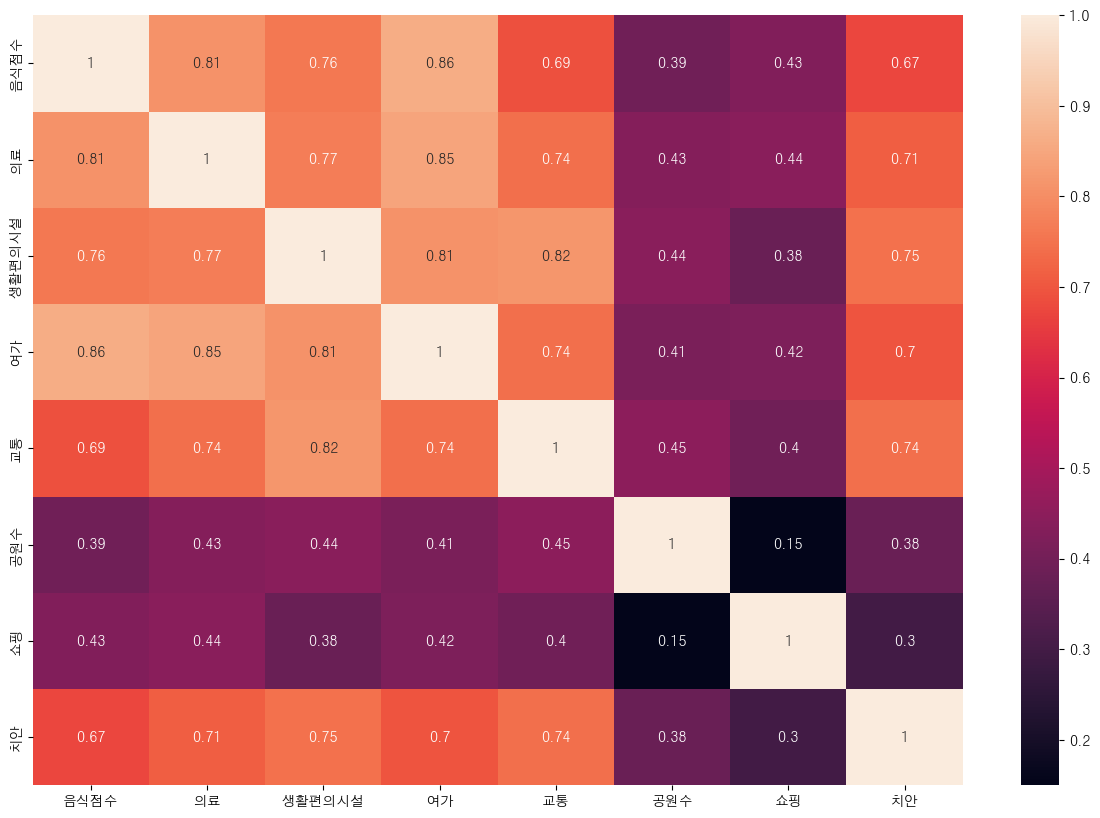

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

### df_x 스케일링

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled = StandardScaler().fit_transform(df_x)

In [21]:
pd.DataFrame(data_scaled).describe().round(2)

,0,1,2,3,4,5,6,7
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.33,-1.32,-1.05,-1.21,-1.20,-0.85,-2.26,-0.86
25%,-1.33,-1.32,-1.05,-1.21,-1.20,-0.85,0.44,-0.86
50%,-0.44,-0.43,-0.23,-0.35,-0.35,-0.85,0.44,0.17
75%,0.45,0.46,0.59,0.51,0.51,1.18,0.44,0.17
max,1.34,1.35,1.41,1.37,1.36,1.18,0.44,2.23


### df_x 차원축소

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=3)
pc = pca.fit_transform(data_scaled)

In [24]:
pcd = pd.DataFrame(pc)
pcd

,0,1,2
0,-2.475093,-0.830028,-0.413409
1,-2.105176,-0.713755,-0.078345
2,-3.027863,1.305258,1.339262
3,-2.799958,-0.884022,-0.472093
4,-2.448158,-0.923515,-0.416735
...,...,...,...
460,2.463685,0.537721,-0.362255
461,3.158300,0.423665,-0.157288
462,3.007959,-0.778305,1.403952
463,3.379641,-0.657143,1.689749


In [25]:
pcd.sort_values(1, ascending=False), pcd.sort_values(0, ascending=False)

(            0         1         2
 357 -1.531246  2.790373  0.239873
 249 -1.904692  2.664321  0.003341
 14  -0.891408  2.609174  0.274849
 308 -1.951509  2.597153 -0.223772
 376 -0.864473  2.515687  0.271523
 ..        ...       ...       ...
 134 -0.394654 -1.127297  0.122955
 71  -1.071319 -1.141798  0.008913
 165 -1.071319 -1.141798  0.008913
 261  0.274791 -1.142976  0.281982
 252 -0.375679 -1.220760  0.176752
 
 [465 rows x 3 columns],
             0         1         2
 418  3.854847  0.598821  0.187194
 373  3.854847  0.598821  0.187194
 365  3.854847  0.598821  0.187194
 364  3.854847  0.598821  0.187194
 362  3.854847  0.598821  0.187194
 ..        ...       ...       ...
 358 -3.399545  1.184096  1.053464
 359 -3.399545  1.184096  1.053464
 360 -3.399545  1.184096  1.053464
 142 -3.399545  1.184096  1.053464
 325 -3.399545  1.184096  1.053464
 
 [465 rows x 3 columns])

### df_x 시각화

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


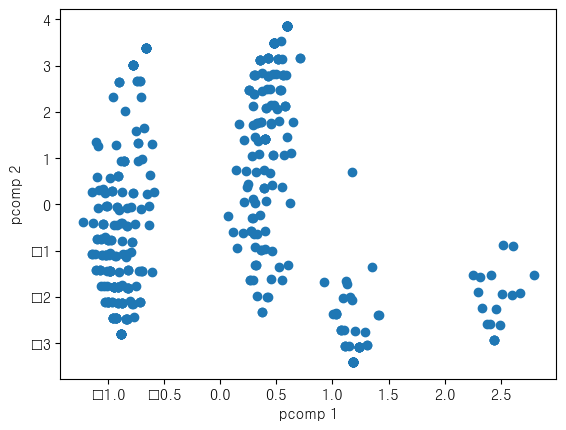

In [26]:
plt.figure()
plt.scatter(pcd[1],pcd[0],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

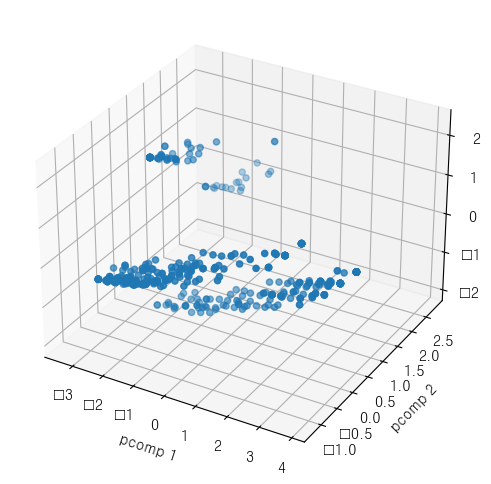

In [27]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2])

### df_1_x

In [28]:
# 데이터 전처리 후 df_x로 지정
df_1_x = pd.DataFrame()
for i in ['복지점수','삶의질', '교통', '음식점수', '쇼핑']:
    df_1_x[i] = pd.qcut(df_1[i], 4, labels=[0, 1, 2, 3])
    df_1_x[i] = df_1_x[i].astype('int64')
# for i in ['쇼핑']:
#     df_1_x[i] = np.digitize(df_1[i], [1,2,3])
df_1_x

,복지점수,삶의질,교통,음식점수,쇼핑
0,0,0,1,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
460,2,2,3,2,2
461,3,3,2,3,3
462,3,3,3,3,3
463,3,3,3,3,3


In [29]:
df_1_x['쇼핑'].value_counts()

0    136
1    124
3    110
2     95
Name: 쇼핑, dtype: int64

In [30]:
corr_1_x = df_1_x.corr()

<AxesSubplot: >

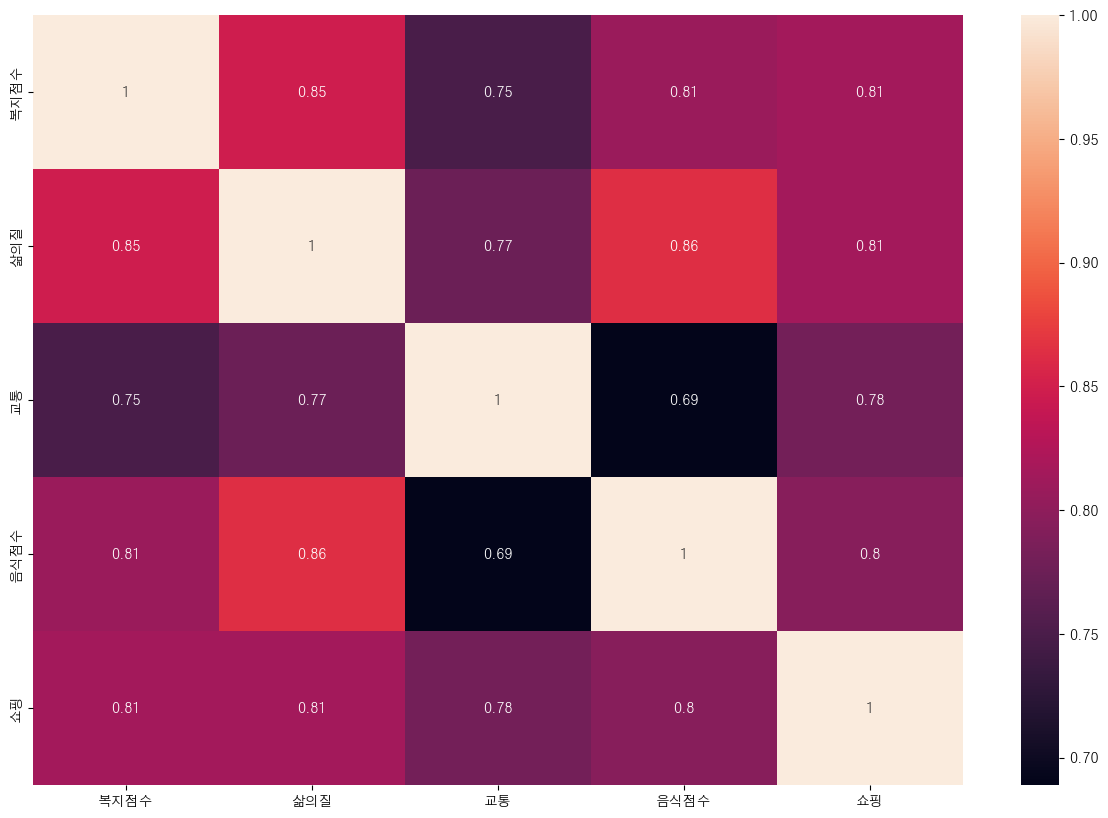

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_1_x, annot=True)

### df_1_x 스케일링

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled_1_x = StandardScaler().fit_transform(df_1_x)

In [33]:
pd.DataFrame(data_scaled_1_x).describe().round(2)

,0,1,2,3,4
count,465.00,465.00,465.00,465.00,465.00
mean,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.33,-1.29,-1.20,-1.33,-1.22
25%,-1.33,-1.29,-1.20,-1.33,-1.22
50%,-0.44,-0.41,-0.35,-0.44,-0.34
75%,0.46,0.47,0.51,0.45,0.54
max,1.35,1.35,1.36,1.34,1.42


### df_1_x 차원축소

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca_1_x = PCA(n_components=3)
pc_1_x = pca.fit_transform(data_scaled_1_x)

In [36]:
pcd_1_x = pd.DataFrame(pc_1_x)
pcd_1_x

,0,1,2
0,-2.087849,0.842253,0.463505
1,-2.846313,0.056112,0.044579
2,-2.846313,0.056112,0.044579
3,-2.450569,0.162262,0.757538
4,-2.046360,0.032996,0.881086
...,...,...,...
460,1.445786,0.747732,-0.252824
461,2.685036,-0.606435,0.333557
462,3.047756,0.073556,0.039524
463,3.047756,0.073556,0.039524


In [37]:
pcd_1_x.sort_values(1, ascending=False), pcd_1_x.sort_values(0, ascending=False)

(            0         1         2
 413 -1.725129  1.522244  0.169472
 354 -1.725129  1.522244  0.169472
 357 -2.120873  1.416094 -0.543487
 193 -2.120873  1.416094 -0.543487
 178 -2.120873  1.416094 -0.543487
 ..        ...       ...       ...
 165 -0.838071 -1.375274 -0.920191
 124 -0.838071 -1.375274 -0.920191
 252 -0.038118 -1.398390 -0.083684
 91  -0.038118 -1.398390 -0.083684
 107 -0.038118 -1.398390 -0.083684
 
 [465 rows x 3 columns],
             0         1         2
 383  3.047756  0.073556  0.039524
 371  3.047756  0.073556  0.039524
 352  3.047756  0.073556  0.039524
 272  3.047756  0.073556  0.039524
 356  3.047756  0.073556  0.039524
 ..        ...       ...       ...
 48  -2.846313  0.056112  0.044579
 109 -2.846313  0.056112  0.044579
 264 -2.846313  0.056112  0.044579
 156 -2.846313  0.056112  0.044579
 142 -2.846313  0.056112  0.044579
 
 [465 rows x 3 columns])

### df_1_x 시각화

C:\Users\Admin\AppData\Local\Temp\ipykernel_12860\2245949723.py:5: UserWarning: Legend does not support handles for Series instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend([pcd_1_x[1], pcd_1_x[0]], ['pcomp 1','pcomp 2'])
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


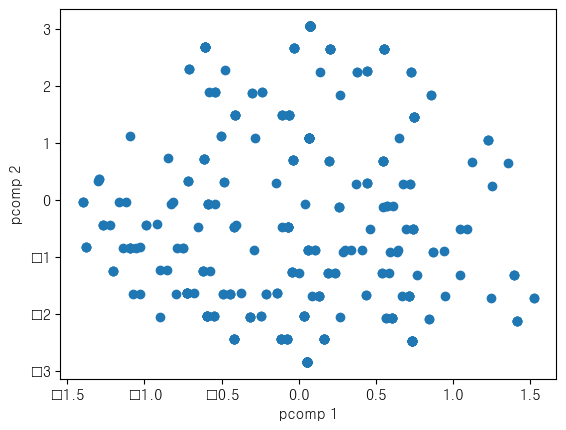

In [162]:
plt.figure()
plt.scatter(pcd_1_x[1],pcd_1_x[0],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

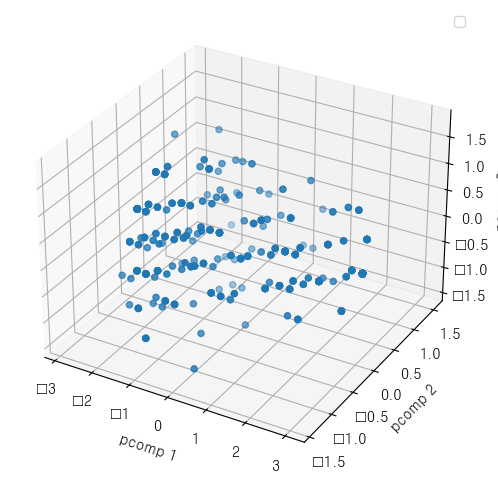

In [158]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_1_x[0],pcd_1_x[1],pcd_1_x[2])

### df_2_x

In [40]:
# 데이터 전처리 후 df_x로 지정
df_2_x = pd.DataFrame()
for i in ['의료', '생활편의시설', '여가', '교통', '음식점수']:
    df_2_x[i] = pd.qcut(df_2[i], 4, labels=[0, 1, 2, 3])
    df_2_x[i] = df_2_x[i].astype('int64')
    
for i in ['쇼핑','생활복지']:
    df_2_x[i] = np.digitize(df_2[i], [1])
df_2_x

,의료,생활편의시설,여가,교통,음식점수,쇼핑,생활복지
0,0,0,0,1,0,1,0
1,0,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
460,2,2,3,3,2,1,1
461,3,3,3,2,3,1,1
462,3,3,3,3,3,1,1
463,3,3,3,3,3,1,1


In [41]:
df_2_x.describe()

,의료,생활편의시설,여가,교통,음식점수,쇼핑,생활복지
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,1.479570,1.277419,1.408602,1.406452,1.492473,0.836559,0.627957
std,1.123856,1.220526,1.161863,1.176440,1.122097,0.370166,0.483870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000


In [42]:
corr_2_x = df_2_x.corr()

<AxesSubplot: >

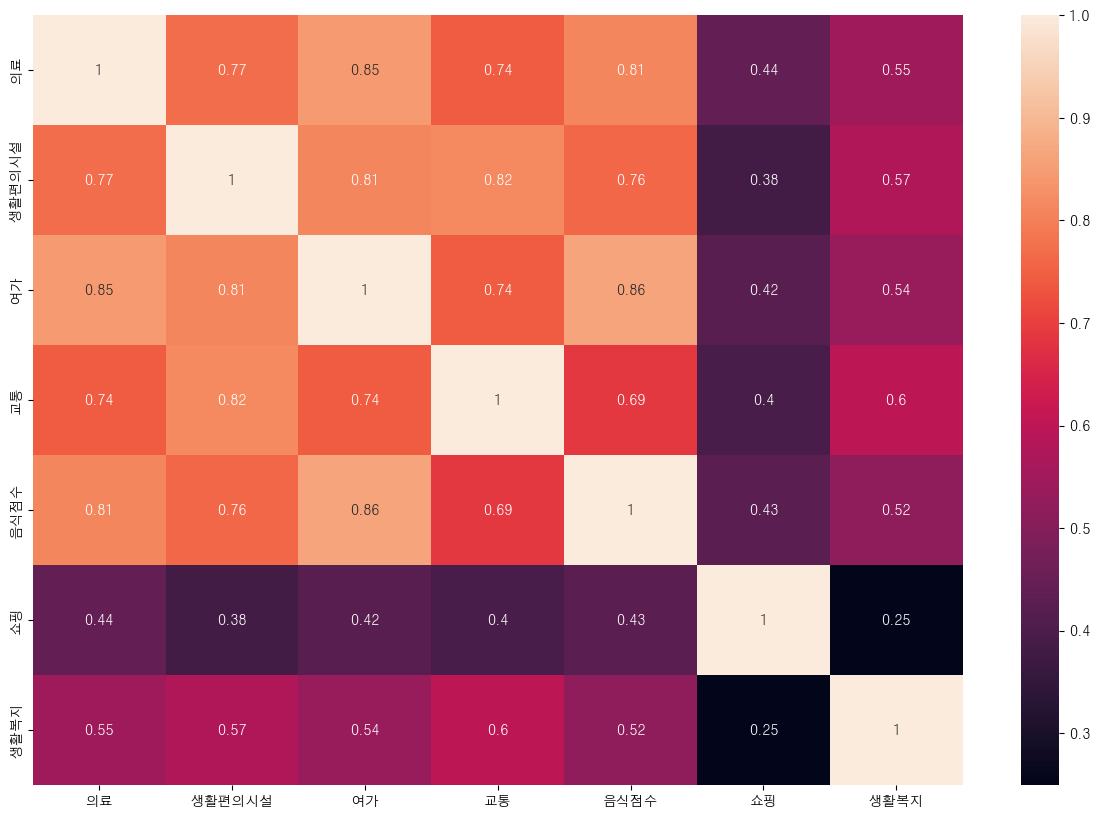

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_2_x, annot=True)

### df_2_x 스케일링

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled_2_x = StandardScaler().fit_transform(df_2_x)

In [45]:
pd.DataFrame(data_scaled_2_x).describe().round(2)

,0,1,2,3,4,5,6
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.32,-1.05,-1.21,-1.20,-1.33,-2.26,-1.30
25%,-1.32,-1.05,-1.21,-1.20,-1.33,0.44,-1.30
50%,-0.43,-0.23,-0.35,-0.35,-0.44,0.44,0.77
75%,0.46,0.59,0.51,0.51,0.45,0.44,0.77
max,1.35,1.41,1.37,1.36,1.34,0.44,0.77


### df_2_x 차원축소

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca_2_x = PCA(n_components=3)
pc_2_x = pca_2_x.fit_transform(data_scaled_2_x)

In [48]:
pcd_2_x = pd.DataFrame(pc_2_x)
pcd_2_x

,0,1,2
0,2.467605,-1.070811,-0.177830
1,1.819515,-0.285046,-1.709871
2,2.814478,2.068802,-0.897162
3,2.807008,-1.173300,-0.113943
4,2.438278,-1.179235,0.064878
...,...,...,...
460,-2.086588,0.152422,-0.192801
461,-2.816527,0.134904,0.398669
462,-3.155931,0.237392,0.334782
463,-3.155931,0.237392,0.334782


In [172]:
pcd_2_x[1]

0     -1.070811
1     -0.285046
2      2.068802
3     -1.173300
4     -1.179235
         ...   
460    0.152422
461    0.134904
462    0.237392
463    0.237392
464    0.122241
Name: 1, Length: 465, dtype: float64

In [49]:
pcd_2_x.sort_values(1, ascending=False), pcd_2_x.sort_values(0, ascending=False)

(            0         1         2
 363 -1.089392  2.506077  0.773425
 14   1.072933  2.385471 -0.428442
 308  1.798501  2.376075 -0.935306
 69   1.068561  2.358557 -0.343836
 396  1.775778  2.294372 -0.623687
 ..        ...       ...       ...
 131  2.443566 -1.184690  0.145188
 9    2.074836 -1.190625  0.324009
 27   2.080123 -1.196079  0.404320
 32   2.080123 -1.196079  0.404320
 61   1.711393 -1.202014  0.583141
 
 [465 rows x 3 columns],
             0         1         2
 128  3.464801  1.282845  0.788396
 360  3.464801  1.282845  0.788396
 49   3.464801  1.282845  0.788396
 314  3.464801  1.282845  0.788396
 92   3.464801  1.282845  0.788396
 ..        ...       ...       ...
 350 -3.155931  0.237392  0.334782
 409 -3.155931  0.237392  0.334782
 408 -3.155931  0.237392  0.334782
 234 -3.155931  0.237392  0.334782
 425 -3.155931  0.237392  0.334782
 
 [465 rows x 3 columns])

### df_2_x 시각화

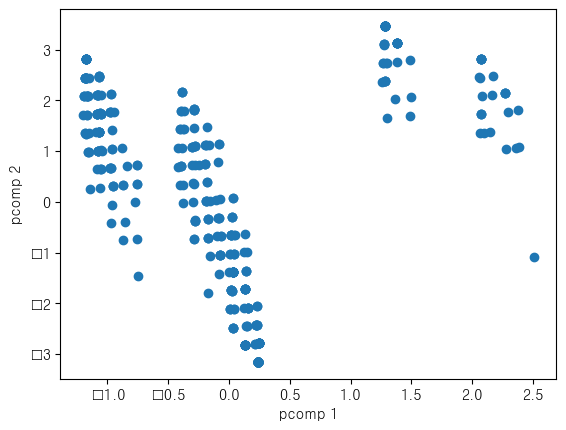

In [171]:
plt.figure()
plt.scatter(pcd_2_x[1],pcd_2_x[0])
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

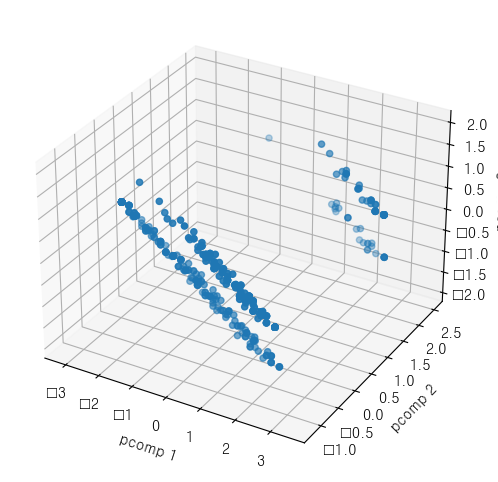

In [51]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_2_x[0],pcd_2_x[1],pcd_2_x[2])

### df_3_x

In [210]:
# 데이터 전처리 후 df_x로 지정
df_3_x = pd.DataFrame()
for i in ['의료', '생활편의시설', '여가', '교통', '음식점수','장보기시설']:
    df_3_x[i] = pd.qcut(df_3[i], 4, labels=[0, 1, 2, 3])
    df_3_x[i] = df_3_x[i].astype('int64')
    
for i in ['쇼핑','생활복지']:
    df_3_x[i] = np.digitize(df_3[i], [1])
df_3_x

,의료,생활편의시설,여가,교통,음식점수,장보기시설,쇼핑,생활복지
0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
460,2,2,3,3,2,2,1,1
461,3,3,3,2,3,3,1,1
462,3,3,3,3,3,3,1,1
463,3,3,3,3,3,3,1,1


In [211]:
df_3_x.describe()

,의료,생활편의시설,여가,교통,음식점수,장보기시설,쇼핑,생활복지
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,1.479570,1.277419,1.408602,1.406452,1.492473,1.356989,0.486022,0.627957
std,1.123856,1.220526,1.161863,1.176440,1.122097,1.189701,0.500343,0.483870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000


In [212]:
corr_3_x = df_3_x.corr()

<AxesSubplot: >

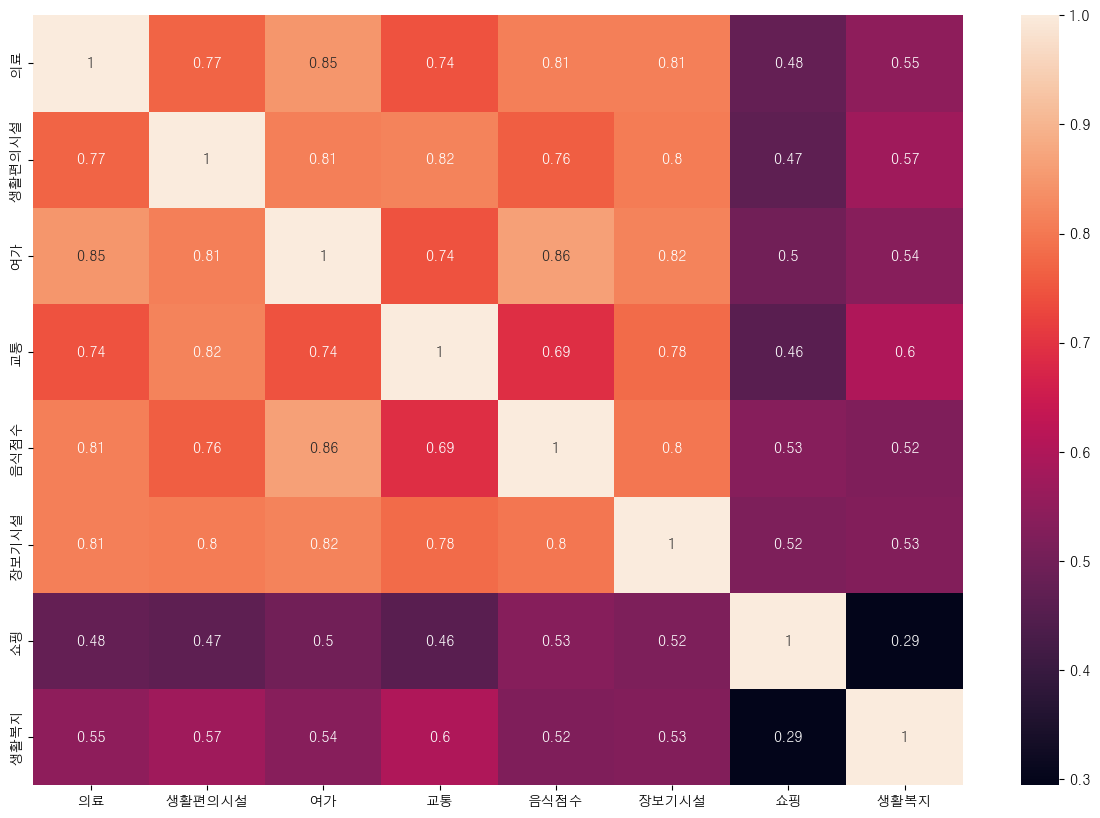

In [213]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_3_x, annot=True)

### df_3_x 스케일링

In [214]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled_3_x = StandardScaler().fit_transform(df_3_x)

In [215]:
pd.DataFrame(data_scaled_3_x).describe().round(2)

,0,1,2,3,4,5,6,7
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.32,-1.05,-1.21,-1.20,-1.33,-1.14,-0.97,-1.30
25%,-1.32,-1.05,-1.21,-1.20,-1.33,-1.14,-0.97,-1.30
50%,-0.43,-0.23,-0.35,-0.35,-0.44,-0.30,-0.97,0.77
75%,0.46,0.59,0.51,0.51,0.45,0.54,1.03,0.77
max,1.35,1.41,1.37,1.36,1.34,1.38,1.03,0.77


### df_3_x 차원축소

In [216]:
from sklearn.decomposition import PCA

In [217]:
pca_3_x = PCA(n_components=3)
pc_3_x = pca_3_x.fit_transform(data_scaled_3_x)

In [219]:
pcd_3_x = pd.DataFrame(pc_3_x)
pcd_3_x

,0,1,2
0,-2.529129,1.541284,-0.738957
1,-2.459050,-1.161802,-1.054509
2,-2.769015,-1.076040,-1.140990
3,-2.840500,1.677849,-0.704803
4,-2.503177,1.656976,-0.513683
...,...,...,...
460,2.280165,0.195931,-0.482517
461,3.272471,0.347638,0.149267
462,3.583842,0.211072,0.115113
463,3.583842,0.211072,0.115113


In [220]:
pcd_3_x.sort_values(1, ascending=False), pcd_3_x.sort_values(0, ascending=False)

(            0         1         2
 71  -0.525445  1.934624  0.548568
 252 -0.176698  1.900022  0.804618
 54  -1.178975  1.886800  0.191305
 27  -2.169827  1.859850 -0.357079
 393 -1.500028  1.856024  0.045138
 ..        ...       ...       ...
 411 -0.535490 -1.493744 -0.487952
 239  1.102069 -1.512359  0.200140
 204 -0.856543 -1.524520 -0.634119
 464  0.769591 -1.529406 -0.010957
 205  0.781016 -1.543135  0.053973
 
 [465 rows x 3 columns],
             0         1         2
 383  3.583842  0.211072  0.115113
 295  3.583842  0.211072  0.115113
 362  3.583842  0.211072  0.115113
 269  3.583842  0.211072  0.115113
 364  3.583842  0.211072  0.115113
 ..        ...       ...       ...
 109 -3.350782  0.077607  0.362813
 260 -3.350782  0.077607  0.362813
 49  -3.350782  0.077607  0.362813
 24  -3.350782  0.077607  0.362813
 325 -3.350782  0.077607  0.362813
 
 [465 rows x 3 columns])

### df_3_x 시각화

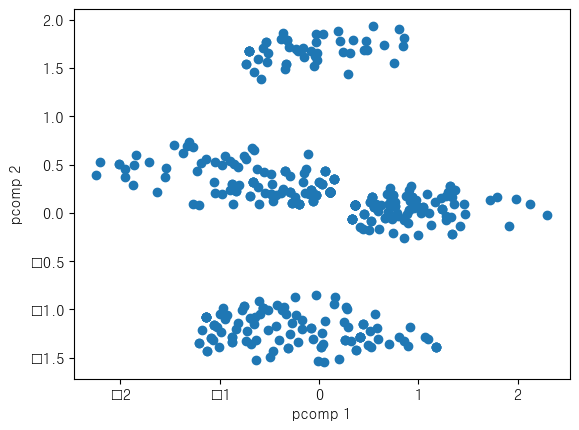

In [223]:
plt.figure()
plt.scatter(pcd_3_x[2],pcd_3_x[1])
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

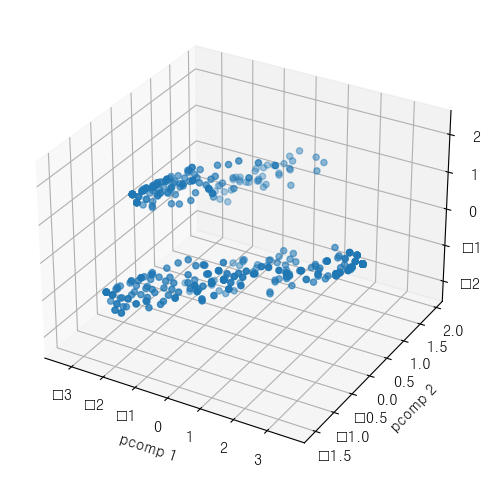

In [222]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_3_x[0],pcd_3_x[1],pcd_3_x[2])

## K-means

### df_x

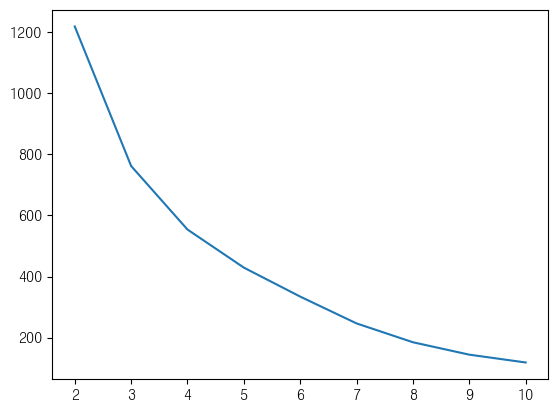

In [ ]:
from sklearn.cluster import KMeans
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=5)

In [ ]:
km.fit_transform(pc)
km.labels_

array([4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 0, 3, 4, 3, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 0, 2, 0, 3, 2, 3, 2, 4, 4, 4,
       2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 0, 3, 4, 0,
       4, 3, 0, 2, 0, 4, 3, 1, 1, 4, 4, 2, 2, 4, 2, 0, 3, 3, 4, 4, 3, 2,
       3, 3, 4, 3, 2, 2, 2, 4, 2, 4, 0, 4, 4, 4, 4, 2, 3, 4, 4, 0, 4, 2,
       0, 0, 4, 0, 4, 4, 2, 2, 0, 2, 4, 2, 4, 4, 0, 4, 2, 2, 2, 2, 0, 4,
       2, 3, 0, 4, 4, 2, 4, 4, 4, 0, 2, 4, 4, 2, 4, 3, 1, 4, 2, 0, 3, 3,
       3, 4, 4, 0, 2, 4, 4, 0, 0, 2, 0, 4, 2, 0, 0, 2, 0, 0, 0, 4, 2, 4,
       2, 2, 4, 3, 4, 0, 3, 2, 0, 0, 4, 4, 3, 3, 1, 1, 4, 2, 2, 4, 0, 3,
       3, 4, 0, 0, 0, 1, 0, 0, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 3, 4, 4,
       2, 4, 4, 4, 4, 4, 0, 2, 2, 4, 0, 4, 4, 4, 4, 2, 4, 2, 2, 0, 4, 4,
       4, 4, 4, 4, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

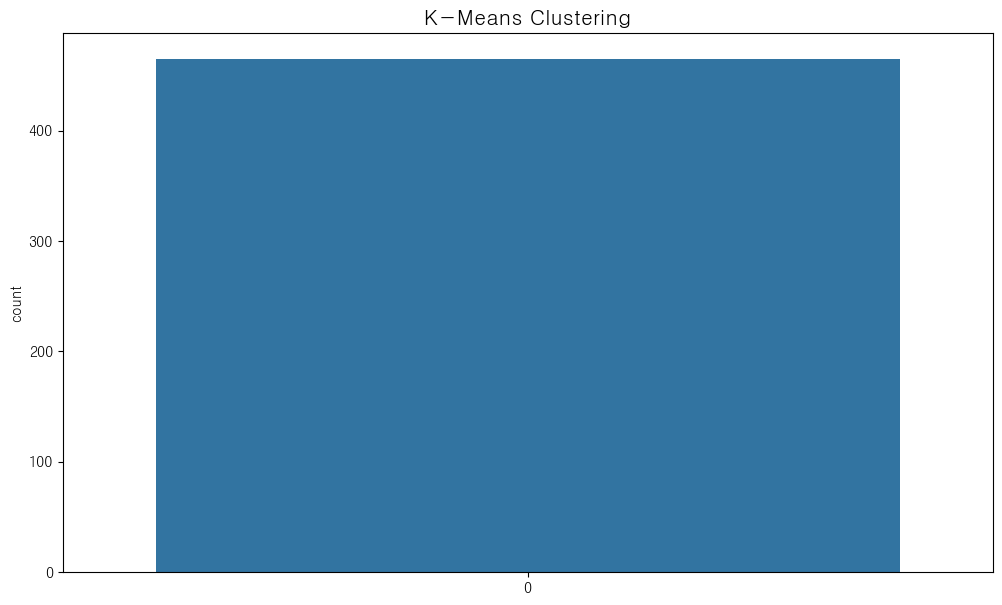

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(pc, km.labels_)
score

0.52780324022401

In [ ]:
pcd = pd.DataFrame(pc)
pcd['cluster_id'] = km.labels_
pcd

,0,1,2,cluster_id
0,-2.475093,-0.830028,-0.413409,4
1,-2.105176,-0.713755,-0.078345,4
2,-3.027863,1.305258,1.339262,2
3,-2.799958,-0.884022,-0.472093,4
4,-2.448158,-0.923515,-0.416735,4
...,...,...,...,...
460,2.463685,0.537721,-0.362255,1
461,3.158300,0.423665,-0.157288,1
462,3.007959,-0.778305,1.403952,1
463,3.379641,-0.657143,1.689749,1


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


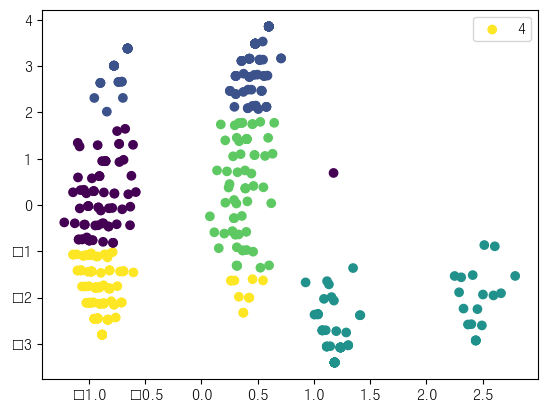

In [ ]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'])
plt.legend((pcd['cluster_id']))
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

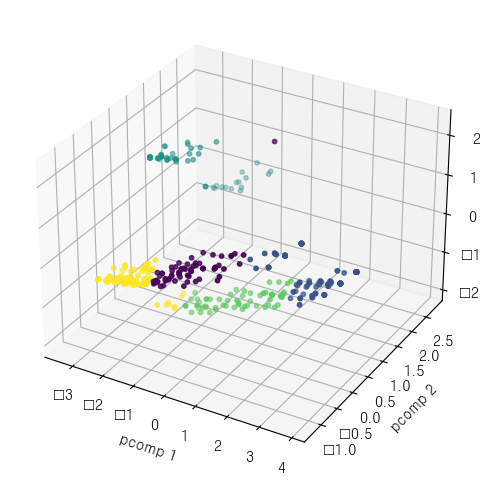

In [ ]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'] , s=10)

### df_1_x

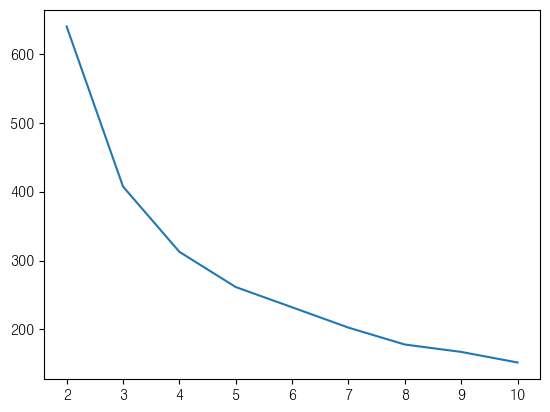

In [ ]:
from sklearn.cluster import KMeans
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc_1_x)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=5)

In [ ]:
km.fit_transform(pc_1_x)
km.labels_

array([3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 4, 4, 1, 4, 3, 4,
       3, 4, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 4, 4, 4, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 1, 3, 1, 4, 0, 4, 3, 0,
       3, 4, 0, 1, 4, 4, 1, 0, 0, 1, 1, 3, 3, 1, 3, 1, 0, 1, 1, 1, 1, 4,
       4, 4, 1, 4, 3, 3, 3, 3, 3, 4, 0, 4, 4, 1, 1, 3, 0, 3, 1, 4, 3, 3,
       4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 0, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 2, 4, 4, 0, 4, 1,
       4, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 4, 3, 4, 4, 3, 1, 4, 0, 4, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 4, 0, 3, 1, 2, 0, 2, 2, 1, 1, 3, 3, 0, 1,
       0, 4, 4, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 3, 4,
       3, 3, 4, 3, 3, 1, 1, 3, 3, 1, 4, 4, 3, 4, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 1, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1,

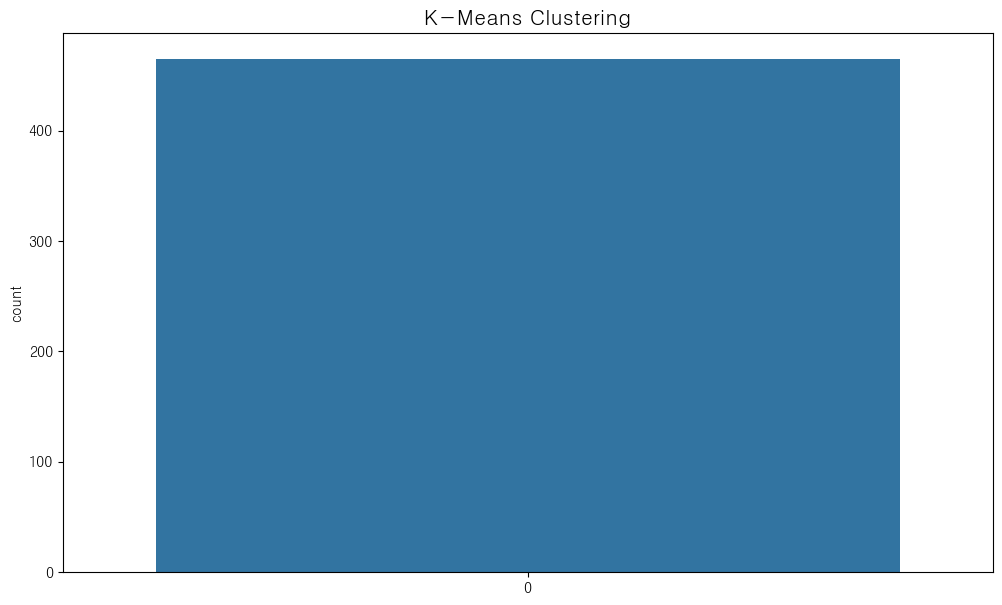

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(pc_1_x, km.labels_)
score

0.4399019766801158

In [ ]:
pcd_1_x = pd.DataFrame(pc_1_x)
pcd_1_x['cluster_id'] = km.labels_
pcd_1_x

,0,1,2,cluster_id
0,-2.087849,0.842253,0.463505,3
1,-2.846313,0.056112,0.044579,3
2,-2.846313,0.056112,0.044579,3
3,-2.450569,0.162262,0.757538,3
4,-2.046360,0.032996,0.881086,3
...,...,...,...,...
460,1.445786,0.747732,-0.252824,0
461,2.685036,-0.606435,0.333557,2
462,3.047756,0.073556,0.039524,2
463,3.047756,0.073556,0.039524,2


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


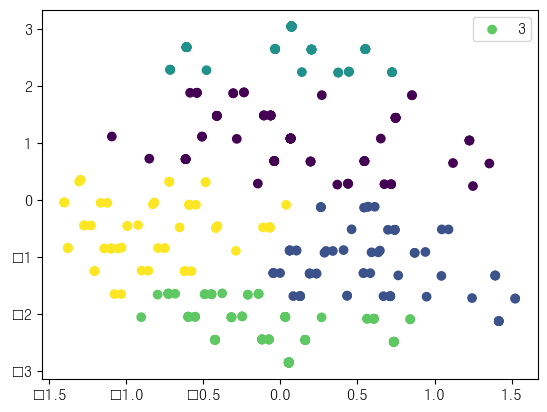

In [ ]:
plt.figure()
plt.scatter(pcd_1_x[1],pcd_1_x[0], c=pcd_1_x['cluster_id'])
plt.legend((pcd_1_x['cluster_id']))
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

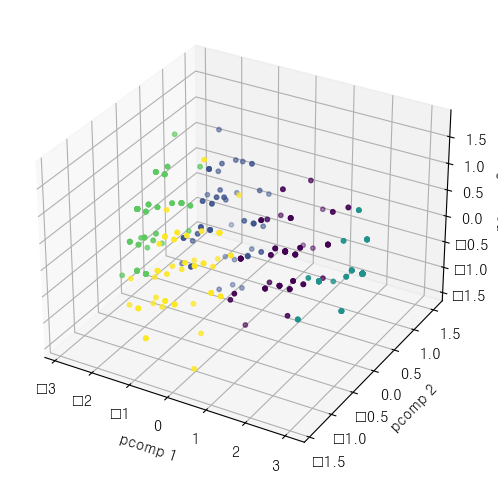

In [ ]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_1_x[0],pcd_1_x[1],pcd_1_x[2], c=pcd_1_x['cluster_id'] , s=10)

### df_2_x

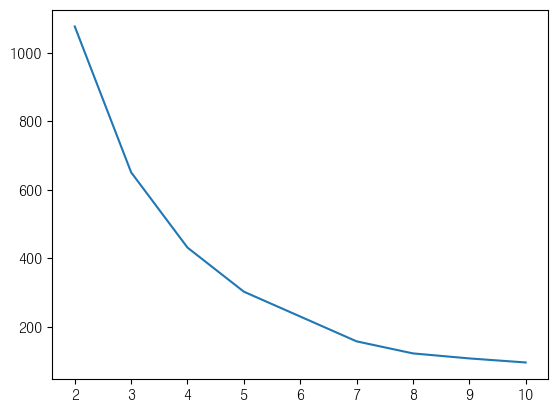

In [ ]:
from sklearn.cluster import KMeans
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc_2_x)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, random_state=5)

In [ ]:
km.fit_transform(pc_2_x)
km.labels_

array([1, 7, 2, 1, 1, 7, 4, 1, 1, 1, 7, 1, 1, 5, 2, 4, 5, 3, 1, 3, 7, 7,
       7, 7, 4, 5, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 5, 7, 4, 7, 4, 7, 1, 1,
       4, 1, 1, 1, 2, 4, 7, 4, 4, 1, 5, 5, 1, 1, 5, 2, 4, 1, 3, 3, 1, 3,
       1, 7, 3, 2, 5, 5, 3, 0, 0, 5, 1, 2, 4, 7, 2, 3, 3, 7, 7, 7, 7, 2,
       7, 3, 1, 3, 4, 2, 4, 1, 4, 5, 3, 5, 5, 1, 1, 4, 0, 1, 7, 3, 7, 4,
       5, 5, 5, 3, 1, 1, 4, 4, 3, 4, 1, 4, 1, 7, 5, 1, 4, 4, 4, 4, 3, 1,
       4, 7, 5, 1, 5, 2, 1, 1, 1, 3, 4, 1, 7, 4, 1, 3, 6, 5, 2, 5, 3, 7,
       3, 7, 1, 0, 2, 1, 7, 0, 3, 4, 5, 5, 4, 3, 5, 4, 5, 3, 3, 5, 4, 1,
       4, 4, 1, 3, 1, 5, 7, 2, 3, 0, 1, 7, 0, 0, 6, 6, 1, 2, 4, 7, 0, 7,
       0, 7, 0, 0, 5, 6, 3, 0, 0, 0, 0, 0, 6, 6, 3, 0, 6, 0, 6, 0, 6, 6,
       0, 0, 6, 0, 6, 6, 6, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 3, 7, 0, 1, 5,
       4, 1, 5, 1, 1, 1, 5, 2, 2, 5, 5, 5, 1, 5, 1, 4, 1, 4, 4, 5, 1, 1,
       7, 1, 1, 1, 2, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6,
       0, 6, 6, 3, 0, 6, 6, 0, 6, 6, 6, 6, 0, 6, 5,

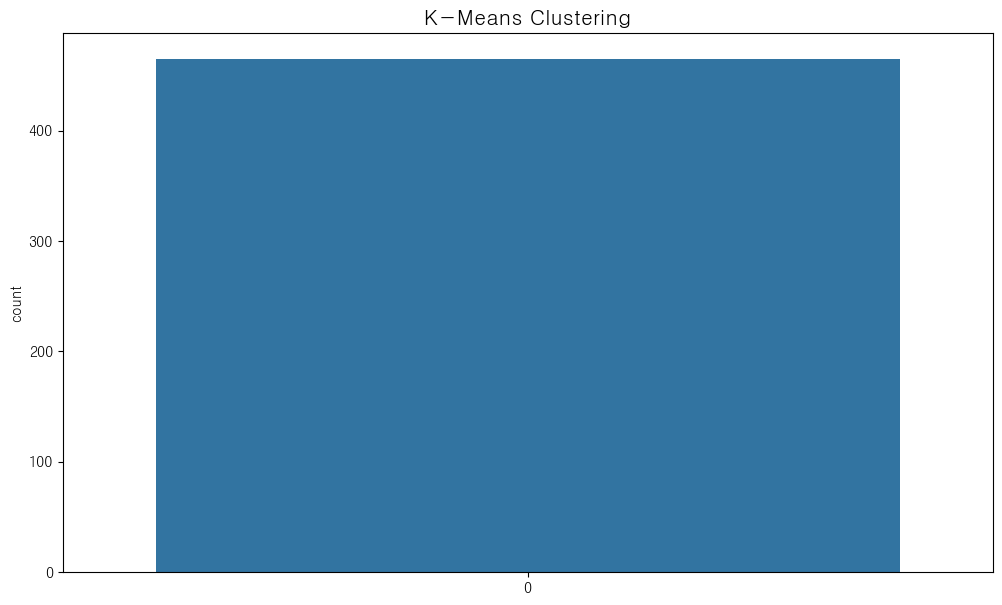

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(pc_2_x, km.labels_)
score

0.6149920402698665

In [ ]:
pcd_2_x = pd.DataFrame(pc_2_x)
pcd_2_x['cluster_id'] = km.labels_
pcd_2_x

,0,1,2,cluster_id
0,2.467605,-1.070811,-0.177830,1
1,1.819515,-0.285046,-1.709871,7
2,2.814478,2.068802,-0.897162,2
3,2.807008,-1.173300,-0.113943,1
4,2.438278,-1.179235,0.064878,1
...,...,...,...,...
460,-2.086588,0.152422,-0.192801,0
461,-2.816527,0.134904,0.398669,6
462,-3.155931,0.237392,0.334782,6
463,-3.155931,0.237392,0.334782,6


In [164]:
plt.figure()
plt.scatter(pcd_2_x[1],pcd_2_x[0], c=pcd_2_x['cluster_id'])
plt.legend((pcd_2_x['cluster_id']))
plt.show()

KeyError: (True, 1)

<Figure size 640x480 with 0 Axes>

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

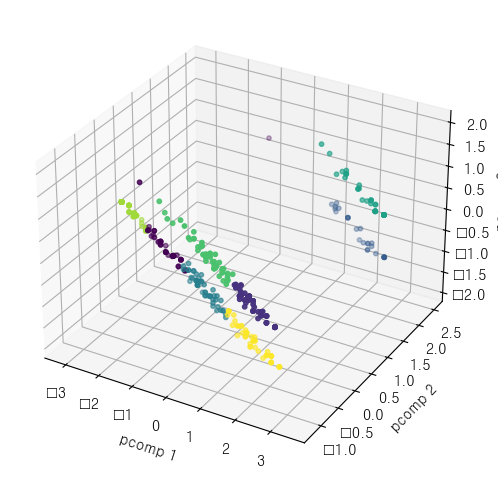

In [ ]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_2_x[0],pcd_2_x[1],pcd_2_x[2], c=pcd_2_x['cluster_id'] , s=10)

## GMM : Gaussian_

In [ ]:
def gaussian_mixture_clustering(X, n_components, init_mu=None, init_cov_mat=None, init_weights=None,
                                epsilon=1e-4, max_iter=20, random_state=100):
    from scipy.stats import multivariate_normal
    import random
    # set initial value
    if init_mu is None:
        random.seed(random_state)
        idx = random.sample(range(X.shape[0]), n_components)
        mu = X[idx,:]
    else:
        mu = init_mu

    if init_cov_mat is None:
        np.random.seed(random_state)
        cov_list = []
        for _ in range(n_components):
            arr = np.random.rand(X.shape[1]**2)+0.1
            temp_mat = np.triu(arr.reshape(X.shape[1], X.shape[1]))
            cov_elem = temp_mat.dot(temp_mat.T)
            cov_list.append(cov_elem)

        cov_mat = np.array(cov_list)
    else:
        cov_mat = init_cov_mat

    if init_weights is None:
        weights = np.array([1/n_components]*n_components)
    else:
        weights = init_weights

    objective_value = -np.infty
    objective_value_history = []
    iteration = 1
    while(iteration<max_iter):
        # E-step
        assign_prob = []
        for i,d in enumerate(X):
            assign_prob_temp = []
            for k in range(n_components):

                assign_prob_temp.append(weights[k]*\
                                multivariate_normal(mean=mu[k],cov=cov_mat[k]).pdf(d))

            assign_prob_temp = np.array(assign_prob_temp)
            assign_prob_temp = assign_prob_temp/np.sum(assign_prob_temp)
            assign_prob.append(assign_prob_temp)

        assign_prob = np.array(assign_prob)

        # M-step
        temp_sum = np.sum(assign_prob, axis=0)
        next_weights = []
        next_mu = []
        next_cov_mat = []
        for k in range(n_components):
            mu_numerator = np.sum(np.expand_dims(assign_prob[:,k],axis=1)*X, axis=0)
            next_mu_vector = mu_numerator/temp_sum[k]
            next_mu.append(next_mu_vector)
            next_weights.append(temp_sum[k]/X.shape[0])

            t = []
            for i,d in enumerate(X):
                tt = d-next_mu_vector
                tt = np.expand_dims(tt,axis=1)
                tt_cov = np.matmul(tt,tt.transpose())
                tt_term = assign_prob[i][k]*tt_cov
                t.append(tt_term)
            t = np.array(t)
            cov_numerator = np.sum(t,axis=0)
            next_cov_mat.append(cov_numerator/temp_sum[k])

        next_objective_value = 0
        for x in X:
            value = np.log(np.sum([next_weights[k]*multivariate_normal(mean=next_mu[k],cov=next_cov_mat[k]).pdf(x) 
                     for k in range(n_components)]))
            next_objective_value += value
        objective_value_history.append(next_objective_value)
        if next_objective_value-objective_value<=epsilon:
            labels = [np.argmax(x) for x in assign_prob]
            return (labels, iteration, objective_value_history)
        else:
            weights = next_weights
            mu = next_mu
            cov_mat = next_cov_mat
            objective_value = next_objective_value
        iteration += 1
    labels = [np.argmax(x) for x in assign_prob]
    return (labels, iteration, objective_value_history)

### df_x

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(pc[:,1],pc[:,2],c=labels)
plt.xlabel('1')
plt.ylabel('2')
plt.show()

NameError: name 'labels' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components= 5, max_iter=100 ,random_state=0)
gmm.fit(pc)
gmm_cluster_labels = gmm.predict(pc)
gmm_cluster_labels

array([3, 0, 2, 3, 3, 0, 2, 3, 3, 3, 4, 3, 3, 3, 2, 2, 3, 4, 3, 4, 4, 4,
       4, 4, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0, 2, 0, 4, 2, 4, 2, 0, 3, 3,
       2, 3, 3, 3, 2, 2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 4, 3, 0,
       3, 4, 0, 2, 0, 3, 4, 0, 4, 3, 3, 2, 2, 0, 2, 0, 4, 4, 0, 0, 4, 2,
       4, 4, 3, 4, 2, 2, 2, 3, 2, 0, 0, 0, 3, 3, 3, 2, 4, 3, 0, 0, 0, 2,
       3, 3, 3, 0, 3, 3, 2, 2, 0, 2, 3, 2, 3, 0, 0, 3, 2, 2, 2, 2, 0, 3,
       2, 4, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 0, 2, 0, 4, 1, 3, 2, 0, 4, 4,
       4, 4, 3, 0, 2, 3, 4, 0, 0, 2, 0, 3, 2, 0, 3, 2, 0, 0, 0, 3, 2, 3,
       2, 2, 3, 4, 3, 0, 4, 2, 0, 0, 3, 4, 4, 4, 4, 4, 3, 2, 2, 4, 0, 4,
       4, 0, 0, 0, 0, 1, 0, 0, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 0, 1, 4,
       0, 0, 4, 4, 1, 1, 1, 4, 4, 4, 0, 1, 0, 1, 1, 1, 1, 0, 0, 4, 3, 3,
       2, 0, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 3, 3,
       0, 0, 3, 3, 2, 1, 4, 0, 1, 0, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1,
       0, 1, 1, 0, 4, 1, 1, 4, 4, 1, 1, 1, 0, 4, 3,

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


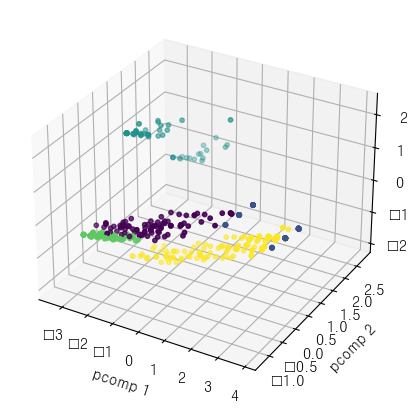

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[:,0],pc[:,1],pc[:,2] , c=gmm_cluster_labels , s=10)
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

In [ ]:
score = silhouette_score(pc, gmm_cluster_labels)
score

0.33124551151793113

### df_1_x

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(pc_1_x[:,1],pc_1_x[:,2],c=labels)
plt.xlabel('1')
plt.ylabel('2')
plt.show()

NameError: name 'labels' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components= 5, max_iter=100 ,random_state=0)
gmm.fit(pc_1_x)
gmm_cluster_labels = gmm.predict(pc_1_x)
gmm_cluster_labels

array([1, 4, 4, 3, 4, 1, 3, 3, 4, 3, 4, 3, 3, 1, 1, 3, 3, 3, 4, 1, 3, 3,
       3, 3, 4, 1, 3, 3, 4, 1, 4, 4, 3, 1, 1, 3, 3, 1, 4, 1, 3, 3, 4, 4,
       4, 4, 1, 1, 4, 4, 3, 3, 3, 4, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 0,
       3, 3, 0, 1, 1, 3, 1, 0, 0, 1, 1, 4, 3, 4, 4, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 3, 4, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 0, 1, 1, 3, 3, 4,
       1, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 1, 3, 3, 4, 4, 4, 3, 0, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1,
       3, 3, 4, 1, 4, 3, 3, 0, 0, 4, 0, 3, 4, 1, 1, 3, 1, 3, 0, 1, 4, 4,
       4, 1, 4, 1, 4, 1, 1, 3, 1, 0, 3, 4, 0, 0, 0, 0, 1, 4, 4, 1, 0, 1,
       0, 3, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 4, 3,
       3, 3, 3, 3, 3, 4, 1, 4, 3, 1, 3, 1, 3, 3, 3, 4, 1, 3, 4, 0, 4, 3,
       4, 3, 1, 3, 4, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1,

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


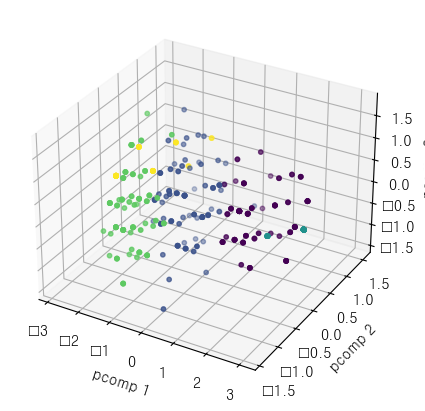

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_1_x[:,0],pc_1_x[:,1],pc_1_x[:,2] , c=gmm_cluster_labels , s=10)
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

In [ ]:
score = silhouette_score(pc_1_x, gmm_cluster_labels)
score

0.2915418988201425

### df_2_x

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(pc_2_x[:,1],pc_2_x[:,2],c=labels)
plt.xlabel('1')
plt.ylabel('2')
plt.show()

NameError: name 'labels' is not defined

<Figure size 800x500 with 0 Axes>

In [149]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components= 5, max_iter=100 ,random_state=0)
gmm.fit(pc_2_x)
gmm_cluster_labels = gmm.predict(pc_2_x)
gmm_cluster_labels

array([1, 0, 4, 1, 1, 0, 3, 1, 1, 1, 0, 1, 1, 1, 4, 3, 1, 0, 1, 0, 0, 0,
       0, 0, 3, 1, 1, 1, 1, 4, 1, 4, 1, 1, 0, 4, 1, 0, 3, 0, 3, 0, 1, 1,
       3, 1, 1, 1, 4, 3, 0, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 1, 0, 0, 1, 0,
       1, 0, 0, 4, 1, 1, 0, 0, 0, 1, 1, 4, 3, 0, 4, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 1, 0, 3, 4, 3, 1, 3, 1, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 3,
       1, 1, 1, 0, 1, 1, 3, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 3, 3, 3, 0, 1,
       3, 0, 1, 1, 1, 4, 1, 1, 1, 0, 3, 1, 0, 3, 1, 0, 2, 1, 4, 1, 0, 0,
       0, 0, 1, 0, 4, 1, 0, 0, 0, 3, 1, 1, 3, 0, 1, 3, 1, 0, 0, 1, 3, 1,
       3, 3, 1, 0, 1, 1, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 4, 3, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1,
       0, 1, 1, 1, 4, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


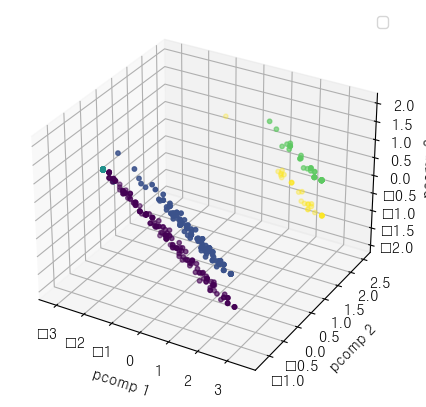

In [154]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_2_x[:,0],pc_2_x[:,1],pc_2_x[:,2] , c=gmm_cluster_labels , s=10)
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.legend()
plt.show()

In [151]:
score = silhouette_score(pc_2_x, gmm_cluster_labels)
score

0.4318296352042123

## DBSCAN

### df_x

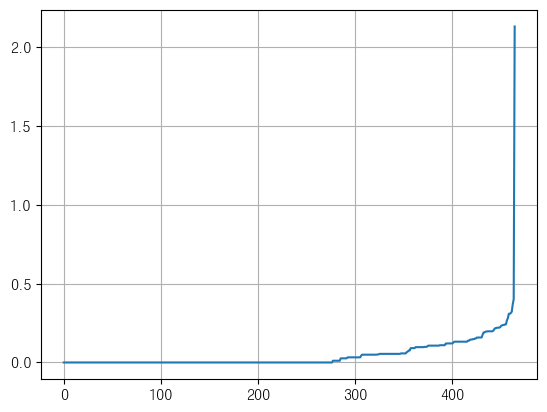

In [52]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pc)
distances, indices = neighbors_fit.kneighbors(pc)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()

학습하기

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [54]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan = DBSCAN(eps=0.4, min_samples=4)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(pc)

dbscan_data
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
display(db_pred.value_counts(), silhouette_score(pc, dbscan_data))

dbscan2_label
 0               185
 2               175
 1                56
 4                19
 3                16
 5                10
-1                 4
dtype: int64

0.3694075861361022

In [55]:
pcd['cluster_id'] = db_pred
pcd

,0,1,2,cluster_id
0,-2.475093,-0.830028,-0.413409,0
1,-2.105176,-0.713755,-0.078345,0
2,-3.027863,1.305258,1.339262,1
3,-2.799958,-0.884022,-0.472093,0
4,-2.448158,-0.923515,-0.416735,0
...,...,...,...,...
460,2.463685,0.537721,-0.362255,2
461,3.158300,0.423665,-0.157288,2
462,3.007959,-0.778305,1.403952,4
463,3.379641,-0.657143,1.689749,5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


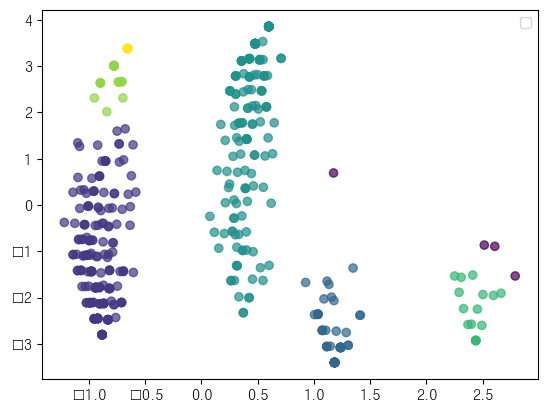

In [56]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

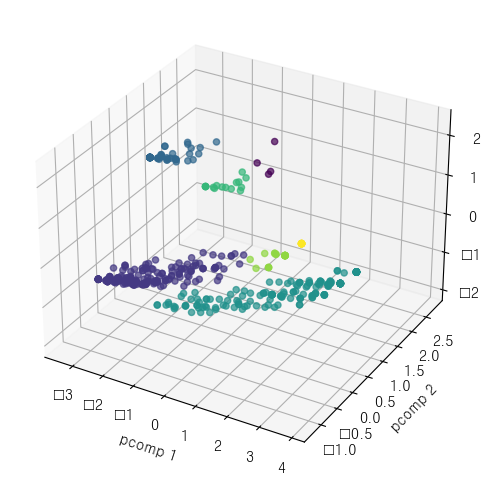

In [57]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'], alpha=0.7)

## df_1_x

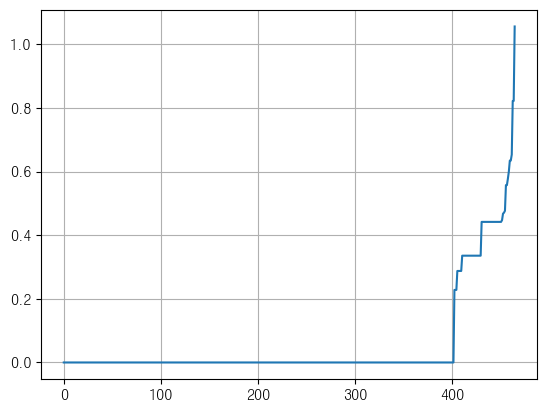

In [58]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors_1 = NearestNeighbors(n_neighbors=20)
neighbors_fit_1 = neighbors_1.fit(pc_1_x)
distances_1, indices_1 = neighbors_fit_1.kneighbors(pc_1_x)
distances_1 = np.sort(distances_1, axis=0)
distances_1 = distances_1[:,1]
plt.plot(distances_1)
plt.grid()

학습하기

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [60]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan_1 = DBSCAN(eps=0.5, min_samples=4)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data_1 = dbscan_1.fit_predict(pc_1_x)

dbscan_data_1
db_pred_1 = pd.DataFrame(dbscan_data_1, columns=['dbscan2_label'])
display(db_pred_1.value_counts(),silhouette_score(pc_2_x, dbscan_data_1))

dbscan2_label
 1               145
 4                98
 0                87
 3                86
-1                18
 7                 7
 2                 6
 6                 5
 8                 5
 5                 4
 9                 4
dtype: int64

-0.3362494012200105

In [61]:
pcd_1_x['cluster_id'] = db_pred_1
pcd_1_x

,0,1,2,cluster_id
0,-2.087849,0.842253,0.463505,0
1,-2.846313,0.056112,0.044579,1
2,-2.846313,0.056112,0.044579,1
3,-2.450569,0.162262,0.757538,1
4,-2.046360,0.032996,0.881086,1
...,...,...,...,...
460,1.445786,0.747732,-0.252824,7
461,2.685036,-0.606435,0.333557,3
462,3.047756,0.073556,0.039524,4
463,3.047756,0.073556,0.039524,4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


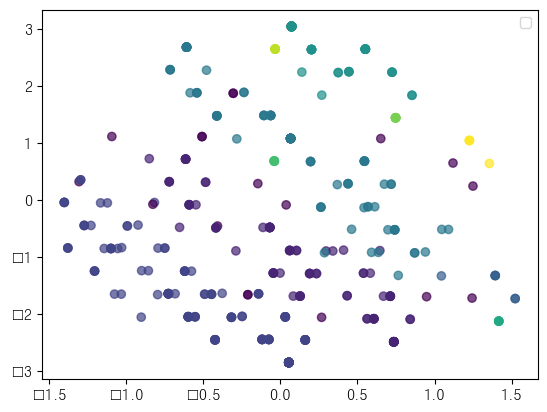

In [62]:
plt.figure()
plt.scatter(pcd_1_x[1],pcd_1_x[0], c=pcd_1_x['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

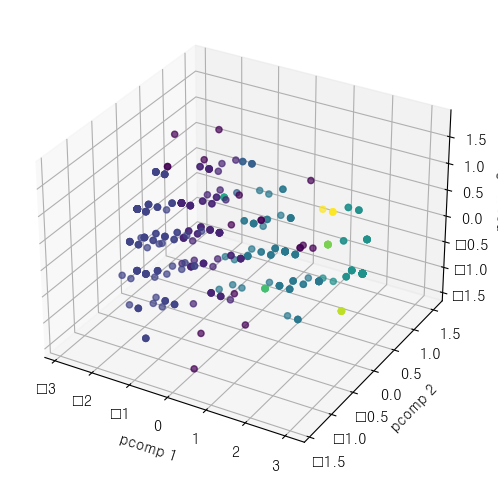

In [63]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_1_x[0],pcd_1_x[1],pcd_1_x[2], c=pcd_1_x['cluster_id'], alpha=0.7)

## df_2_x

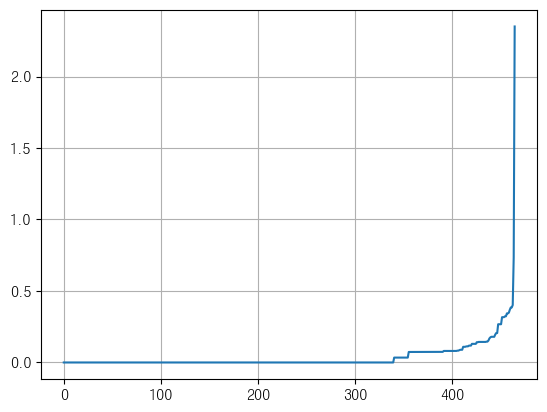

In [64]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors_2 = NearestNeighbors(n_neighbors=20)
neighbors_fit_2 = neighbors_2.fit(pc_2_x)
distances_2, indices_2 = neighbors_fit_2.kneighbors(pc_2_x)
distances_2 = np.sort(distances_2, axis=0)
distances_2 = distances_2[:,1]
plt.plot(distances_2)
plt.grid()

학습하기

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [66]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan_2 = DBSCAN(eps=0.41, min_samples=4)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data_2 = dbscan_2.fit_predict(pc_2_x)

dbscan_data_2
db_pred_2 = pd.DataFrame(dbscan_data_2, columns=['dbscan2_label'])
display(db_pred_2.value_counts(),silhouette_score(pc_2_x, dbscan_data_2))

dbscan2_label
 1               265
 0               123
 3                47
 2                26
-1                 4
dtype: int64

0.4698707292022436

In [67]:
pcd_2_x['cluster_id'] = db_pred_2
pcd_2_x

,0,1,2,cluster_id
0,2.467605,-1.070811,-0.177830,0
1,1.819515,-0.285046,-1.709871,1
2,2.814478,2.068802,-0.897162,2
3,2.807008,-1.173300,-0.113943,0
4,2.438278,-1.179235,0.064878,0
...,...,...,...,...
460,-2.086588,0.152422,-0.192801,1
461,-2.816527,0.134904,0.398669,1
462,-3.155931,0.237392,0.334782,1
463,-3.155931,0.237392,0.334782,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


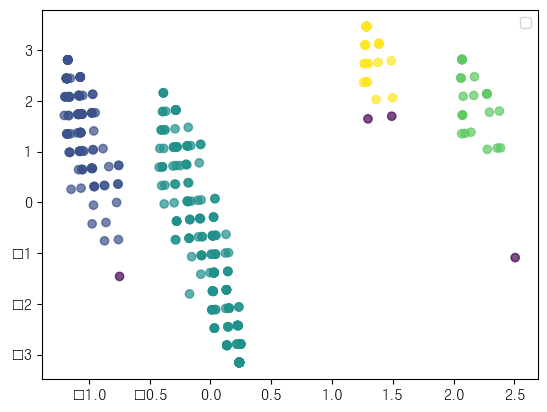

In [68]:
plt.figure()
plt.scatter(pcd_2_x[1],pcd_2_x[0], c=pcd_2_x['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

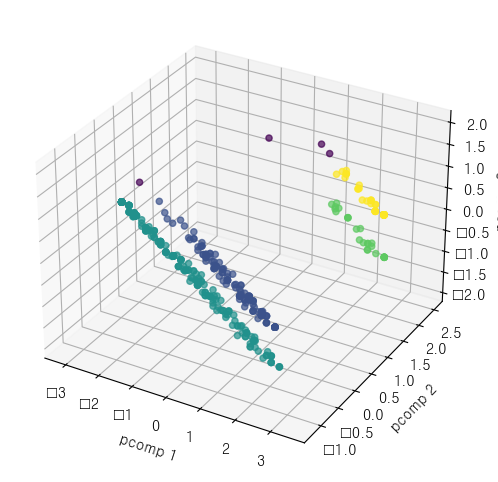

In [69]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_2_x[0],pcd_2_x[1],pcd_2_x[2], c=pcd_2_x['cluster_id'], alpha=0.7)

## 학습시키기(KNN)

### df_x

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcd.drop('cluster_id',axis=1), pcd.drop([0,1,2],axis=1), random_state=30)
X_train.shape, X_test.shape

((348, 3), (117, 3))

In [71]:
np.array(y_train).reshape(1, -1).round(2)

array([[ 0,  2,  4,  0,  0,  3,  2,  0,  2,  2,  1,  3,  1,  2,  2,  2,
         3,  4,  0,  0,  2,  0,  0,  2,  0,  2,  1,  1,  4,  4,  3,  2,
         2,  2,  2,  3,  0,  0,  1,  0,  2,  4,  2,  1,  2,  0,  0,  0,
         2,  0,  2,  2,  0,  2,  0,  0,  2,  0,  2,  0,  3,  2,  1,  0,
         2,  0,  2,  5,  2,  0,  0,  0,  2,  0,  0,  3,  1,  0,  2,  2,
         0,  0,  2,  0,  0,  2,  2,  0,  0,  2,  0,  0,  5,  2,  0,  2,
         2,  0,  0,  0,  1,  0,  0,  2,  0,  0,  2,  0,  0,  2,  2,  4,
         2,  2,  2,  0,  0,  3,  2,  0,  0,  0,  0,  0,  1,  1,  0,  2,
         0,  1,  2,  2,  2,  0,  2,  2,  0,  2,  2,  0,  2,  1,  1,  2,
         2,  2, -1,  2,  1,  2,  2,  3,  4,  0,  0,  0,  4,  2,  2,  2,
         2,  0,  2,  0,  1,  2,  2,  0,  0,  0,  2,  2,  2,  2,  0,  2,
         2,  2,  4,  2,  0,  4,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,
         0,  0,  2,  0,  2,  0,  2,  2,  1,  2,  0,  2,  0,  1,  2,  0,
         0,  2,  1,  0,  5,  4,  0,  0,  0,  2,  2,  0,  2,  2, 

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 5, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 1, 1, 4, 2, 0, 0, 0, 5, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0, 1, 2, 2,
       1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 4, 2, 2, 2, 0, 3, 0, 4, 2, 1, 0, 1,
       2, 0, 3, 1, 0, 2, 1, 2, 5, 3, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 2, 0, 2], dtype=int64)

In [73]:
(pred == np.array(y_test).reshape(1, -1)).mean()

0.9914529914529915

In [74]:
knn.score(X_test, y_test)

0.9914529914529915

### df_1_x

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcd_1_x.drop('cluster_id',axis=1), pcd_1_x.drop([0,1,2],axis=1), random_state=30)
X_train.shape, X_test.shape

((348, 3), (117, 3))

In [76]:
np.array(y_train).reshape(1, -1).round(2)

array([[-1, -1,  4,  3,  0,  0,  4,  1,  3,  3,  1,  0,  1,  4,  4,  4,
        -1,  4,  1,  0,  1,  1,  6,  3,  0,  1,  5,  1,  4,  4,  1,  4,
         9,  1,  3,  1,  1, -1,  1,  1,  4,  4,  4,  1,  4,  0,  3,  1,
         4,  1, -1,  4,  2,  3,  1, -1,  3,  3,  4,  1,  0,  4,  1,  1,
         4, -1,  0,  4,  3,  3,  1,  0,  4,  3,  0,  1,  1,  3,  1,  3,
         7,  1,  3,  1,  6,  4,  8,  3,  3,  4,  1,  1,  4,  0,  0,  4,
         4,  3,  1,  0,  1,  2,  1,  4,  2,  1,  4,  0,  1,  0,  4,  8,
         4,  4,  4,  0,  1,  1,  4,  1,  0,  3,  1,  1,  1,  1,  0,  4,
         1,  1,  3,  9,  0,  1,  7,  3,  3,  3,  3,  1,  4,  1,  0,  7,
         4,  3,  5,  4,  1,  1,  4,  1,  4, -1,  0,  1,  8,  0,  4,  4,
         0,  1,  1,  1,  1,  0,  4,  1,  0,  0,  4,  1,  4,  3,  0,  4,
         4,  0,  4,  4,  1,  3,  1,  1,  0,  3,  3,  3,  1,  0,  3,  0,
         0, -1,  7,  1,  8,  1,  3,  4,  0,  4,  0,  4,  0,  0,  4,  1,
         3,  4,  1, -1,  4,  4,  1,  1,  0,  3,  1,  3,  0,  0, 

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([ 3,  1,  1,  3,  1,  1,  3,  0,  3,  2,  7,  3,  3,  0,  1,  0,  0,
        3,  4,  1,  1, -1,  0,  3,  1,  4,  1,  3,  3,  4,  1,  0,  3,  4,
        3,  1,  1,  4,  4,  1,  1,  0,  0,  0,  1,  0,  0,  4,  3,  1,  7,
        0,  4,  1,  4,  0,  0,  1,  3,  1,  1,  4,  5,  1,  3,  3,  0,  1,
        0,  4,  1,  0,  4,  8,  1,  0,  4,  1,  3,  3,  1,  1,  0,  4,  7,
        1,  3,  1,  4,  1,  1,  0,  1,  3,  1,  4,  4,  1,  1,  0,  0,  0,
        4,  0,  6,  4,  4,  3,  4,  3,  4,  3,  1,  0,  4,  1,  1],
      dtype=int64)

In [78]:
(pred == np.array(y_test).reshape(1, -1)).mean()

0.9401709401709402

In [79]:
knn.score(X_test, y_test)

0.9401709401709402

### df_2_x

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcd_2_x.drop('cluster_id',axis=1), pcd_2_x.drop([0,1,2],axis=1), random_state=30)
X_train.shape, X_test.shape

((348, 3), (117, 3))

In [81]:
np.array(y_train).reshape(1, -1).round(2)

array([[ 1,  1,  1,  1,  0,  2,  1,  0,  1,  1,  3,  2,  3,  1,  1,  1,
         2,  1,  0,  1,  1,  0,  1,  1,  1,  1,  2,  3,  1,  1,  2,  1,
         1,  1,  1,  2,  0,  0,  3,  0,  1,  1,  1,  3,  1,  0,  0,  1,
         1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  2,  1,  3,  0,
         1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  2,  2,  0,  1,  1,
         1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,
         1,  1,  0,  1,  3,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,
         1,  1,  1,  0,  1,  2,  1,  0,  1,  1,  0,  0,  3,  3,  1,  1,
         0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  3,  3,  1,
         1,  1,  2,  1,  3,  1,  1,  2,  1,  0,  1,  0,  1,  1,  1,  1,
         1,  0,  1,  0,  3,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1,
         1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,
         1,  1,  1,  0,  1,  0,  1,  1,  3,  1,  0,  1,  0,  2,  1,  0,
         1,  1,  3,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1, 

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 1, 3, 1, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 0,
       0, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       3, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 3,
       1, 0, 2, 3, 0, 1, 3, 1, 1, 2, 3, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [83]:
(pred == np.array(y_test).reshape(1, -1)).mean()

0.9829059829059829

In [84]:
knn.score(X_test, y_test)

0.9829059829059829

## Model Test

In [124]:
import random

# 랜덤으로 숫자생성해봄
test_att = []
for i in range(1,6):
    test_att.append(random.randint(0, 3))
for i in range(1,3):
    test_att.append(random.randint(0,1))

# 데이터프레임화 시켜줌
test_attr_array = np.array(test_att)
test_data = pd.DataFrame(test_attr_array).transpose()

# 정규화
Scaling_tool = StandardScaler()
Scaling_tool.fit(df_2_x)
test_scaled = Scaling_tool.transform(test_data)

# 차원축소
pca_tool = PCA(n_components=3)
pca_tool.fit(data_scaled_2_x)
test_pca = pca_tool.transform(test_scaled)
knn.predict(test_pca)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## 데이터 로드

In [ ]:
# 최종 가공한 데이터셋 로드(git hub 기준)
df = pd.read_csv('dataset/법정동과 편의시설_1020.csv', index_col=0)
df

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,세탁업,영화상영관,제과점영업,체력단련장업,...,119안전센터,공원수,노래방수,당구장,도서관,박물관미술관,우체국,음식점수,카페수,패스트푸드
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,16.0,8.0,0.0
1,신교동,0,0,0,0,0,2,0,1,0,...,1,0,0,1,0.0,0.0,0.0,10.0,1.0,0.0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,4.0,1.0,0.0
3,효자동,0,2,1,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,16.0,5.0,0.0
4,창성동,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,23.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,9,0,8,8,...,0,1,15,5,1.0,0.0,0.0,187.0,34.0,3.0
461,암사동,1,29,3,8,3,23,0,22,16,...,1,1,29,12,1.0,0.0,0.0,411.0,69.0,9.0
462,성내동,1,54,3,14,4,35,19,34,30,...,1,0,60,25,1.0,0.0,0.0,982.0,142.0,20.0
463,천호동,3,51,3,7,3,47,6,37,14,...,1,0,44,22,2.0,0.0,0.0,1001.0,136.0,28.0


In [ ]:
# 최종 가공한 데이터셋 로드 (정윤님)
df = pd.read_csv('../Dataset/법정동과 편의시설_1020.csv')
df.head()

### df_3

In [ ]:
df_3 = df.copy()

In [ ]:
# 연관 컬럼 묶어주기 (default)
df_3['의료'] = df['병원'] + df['의원'] + df['약국']
df_3['생활복지시설'] = df['치안센터'] + df['경찰서'] + df['119안전센터'] + df['우체국'] + df['도서관']
df_3['생활편의시설'] = df['목욕장업'] + df['세탁업']
df_3['여가'] = df['골프연습장업'] + df['체력단련장업'] + df['당구장'] + df['노래방수'] + df['영화상영관'] + df['공원수'] + df['박물관미술관'] 
df_3['교통'] = df['지하철역'] + df['버스정류소']
df_3['쇼핑시설'] = df['백화점'] + df['복합쇼핑몰'] + df['쇼핑센터'] + df['서점'] 
df_3['장보기시설'] = df['대규모점포'] + df['구분없음'] + df['대형마트'] + df['시장']  + df['제과점영업']
df_3

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,세탁업,영화상영관,제과점영업,체력단련장업,...,음식점수,카페수,패스트푸드,의료,생활복지시설,생활편의시설,여가,교통,쇼핑시설,장보기시설
0,청운동,0,7,2,0,0,0,0,0,0,...,16.0,8.0,0.0,0,1.0,0,0.0,7,2,0
1,신교동,0,0,0,0,0,2,0,1,0,...,10.0,1.0,0.0,1,1.0,2,1.0,0,0,1
2,궁정동,0,1,0,0,0,0,0,0,0,...,4.0,1.0,0.0,0,1.0,0,0.0,1,0,0
3,효자동,0,2,1,0,0,0,0,1,0,...,16.0,5.0,0.0,0,0.0,0,0.0,2,1,1
4,창성동,0,2,2,0,0,0,0,0,0,...,23.0,3.0,0.0,4,0.0,0,0.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,9,0,8,8,...,187.0,34.0,3.0,34,3.0,11,35.0,40,1,8
461,암사동,1,29,3,8,3,23,0,22,16,...,411.0,69.0,9.0,92,4.0,26,66.0,30,3,23
462,성내동,1,54,3,14,4,35,19,34,30,...,982.0,142.0,20.0,170,4.0,39,148.0,55,3,37
463,천호동,3,51,3,7,3,47,6,37,14,...,1001.0,136.0,28.0,205,6.0,50,93.0,54,4,42


In [ ]:
# 필요한 컬럼값만 추출
df_3 = df_3[['법정동명', '의료', '생활복지시설', '생활편의시설', '여가', '교통', '음식점수', '카페수', '패스트푸드', '쇼핑시설', '장보기시설']]
df_3

,법정동명,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
0,청운동,0,1.0,0,0.0,7,16.0,8.0,0.0,2,0
1,신교동,1,1.0,2,1.0,0,10.0,1.0,0.0,0,1
2,궁정동,0,1.0,0,0.0,1,4.0,1.0,0.0,0,0
3,효자동,0,0.0,0,0.0,2,16.0,5.0,0.0,1,1
4,창성동,4,0.0,0,0.0,2,23.0,3.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,34,3.0,11,35.0,40,187.0,34.0,3.0,1,8
461,암사동,92,4.0,26,66.0,30,411.0,69.0,9.0,3,23
462,성내동,170,4.0,39,148.0,55,982.0,142.0,20.0,3,37
463,천호동,205,6.0,50,93.0,54,1001.0,136.0,28.0,4,42


In [ ]:
# 분포
df_3.describe()

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,42.230108,1.907527,10.045161,31.486022,24.533333,262.501075,33.696774,4.159140,1.503226,9.724731
std,84.166225,2.617507,17.157740,54.878945,36.636369,409.604599,53.327474,7.369588,2.705456,15.199022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,3.000000,3.000000,35.000000,5.000000,0.000000,0.000000,1.000000
50%,11.000000,1.000000,3.000000,7.000000,8.000000,100.000000,13.000000,1.000000,0.000000,3.000000
75%,46.000000,3.000000,13.000000,34.000000,34.000000,312.000000,38.000000,5.000000,2.000000,12.000000
max,805.000000,16.000000,138.000000,365.000000,274.000000,3057.000000,375.000000,63.000000,20.000000,93.000000


## 데이터 전처리

### df_3_x

In [ ]:
df_3_x = df_3.copy()

In [ ]:
df_3_x.loc[(df_3_x['의료'] == 2), '의료'] = 1
df_3_x.loc[(df_3_x['의료'] >= 3) & (df_3_x['의료'] <= 5), '의료'] = 2
df_3_x.loc[(df_3_x['의료'] >= 6) & (df_3_x['의료'] <= 10), '의료'] = 3
df_3_x.loc[(df_3_x['의료'] >= 11) & (df_3_x['의료'] <= 20), '의료'] = 4
df_3_x.loc[(df_3_x['의료'] >= 21) & (df_3_x['의료'] <= 46), '의료'] = 5
df_3_x.loc[(df_3_x['의료'] >= 47) & (df_3_x['의료'] <= 99), '의료'] = 6
df_3_x.loc[(df_3_x['의료'] >= 100), '의료'] = 7

df_3_x.loc[(df_3_x['생활복지시설'] == 2), '생활복지시설'] = 1
df_3_x.loc[(df_3_x['생활복지시설'] >= 3), '생활복지시설'] = 2

df_3_x.loc[(df_3_x['생활편의시설'] == 2), '생활편의시설'] = 1
df_3_x.loc[(df_3_x['생활편의시설'] >= 3) & (df_3_x['생활편의시설'] <= 10), '생활편의시설'] = 2
df_3_x.loc[(df_3_x['생활편의시설'] >= 11), '생활편의시설'] = 3

df_3_x.loc[(df_3_x['여가'] == 2), '여가'] = 1
df_3_x.loc[(df_3_x['여가'] >= 3) & (df_3_x['여가'] <= 5), '여가'] = 2
df_3_x.loc[(df_3_x['여가'] >= 6) & (df_3_x['여가'] <= 11), '여가'] = 3
df_3_x.loc[(df_3_x['여가'] >= 12) & (df_3_x['여가'] <= 34), '여가'] = 4
df_3_x.loc[(df_3_x['여가'] >= 35) & (df_3_x['여가'] <= 117), '여가'] = 5
df_3_x.loc[(df_3_x['여가'] >= 118), '여가'] = 6

df_3_x.loc[(df_3_x['교통'] == 5), '교통'] = 4
df_3_x.loc[(df_3_x['교통'] >= 6) & (df_3_x['교통'] <= 7), '교통'] = 5
df_3_x.loc[(df_3_x['교통'] >= 8) & (df_3_x['교통'] <= 12), '교통'] = 6
df_3_x.loc[(df_3_x['교통'] >= 13) & (df_3_x['교통'] <= 20), '교통'] = 7
df_3_x.loc[(df_3_x['교통'] >= 21) & (df_3_x['교통'] <= 31), '교통'] = 8
df_3_x.loc[(df_3_x['교통'] >= 32) & (df_3_x['교통'] <= 46), '교통'] = 9
df_3_x.loc[(df_3_x['교통'] >= 47) & (df_3_x['교통'] <= 72), '교통'] = 10
df_3_x.loc[(df_3_x['교통'] >= 73), '교통'] = 11

df_3_x.loc[(df_3_x['음식점수'] >= 0) & (df_3_x['음식점수'] <= 13), '음식점수'] = 0
df_3_x.loc[(df_3_x['음식점수'] >= 14) & (df_3_x['음식점수'] <= 25), '음식점수'] = 1
df_3_x.loc[(df_3_x['음식점수'] >= 26) & (df_3_x['음식점수'] <= 41), '음식점수'] = 2
df_3_x.loc[(df_3_x['음식점수'] >= 42) & (df_3_x['음식점수'] <= 60), '음식점수'] = 3
df_3_x.loc[(df_3_x['음식점수'] >= 61) & (df_3_x['음식점수'] <= 86), '음식점수'] = 4
df_3_x.loc[(df_3_x['음식점수'] >= 87) & (df_3_x['음식점수'] <= 117), '음식점수'] = 5
df_3_x.loc[(df_3_x['음식점수'] >= 118) & (df_3_x['음식점수'] <= 175), '음식점수'] = 6
df_3_x.loc[(df_3_x['음식점수'] >= 176) & (df_3_x['음식점수'] <= 286), '음식점수'] = 7
df_3_x.loc[(df_3_x['음식점수'] >= 287) & (df_3_x['음식점수'] <= 445), '음식점수'] = 8
df_3_x.loc[(df_3_x['음식점수'] >= 446) & (df_3_x['음식점수'] <= 920), '음식점수'] = 9
df_3_x.loc[(df_3_x['음식점수'] >= 921), '음식점수'] = 10

df_3_x.loc[(df_3_x['카페수'] >= 0) & (df_3_x['카페수'] <= 2), '카페수'] = 0
df_3_x.loc[(df_3_x['카페수'] >= 3) & (df_3_x['카페수'] <= 4), '카페수'] = 1
df_3_x.loc[(df_3_x['카페수'] >= 5) & (df_3_x['카페수'] <= 7), '카페수'] = 2
df_3_x.loc[(df_3_x['카페수'] >= 8) & (df_3_x['카페수'] <= 10), '카페수'] = 3
df_3_x.loc[(df_3_x['카페수'] >= 11) & (df_3_x['카페수'] <= 15), '카페수'] = 4
df_3_x.loc[(df_3_x['카페수'] >= 16) & (df_3_x['카페수'] <= 26), '카페수'] = 5
df_3_x.loc[(df_3_x['카페수'] >= 27) & (df_3_x['카페수'] <= 42), '카페수'] = 6
df_3_x.loc[(df_3_x['카페수'] >= 43) & (df_3_x['카페수'] <= 85), '카페수'] = 7
df_3_x.loc[(df_3_x['카페수'] >= 86), '카페수'] = 8

df_3_x.loc[(df_3_x['패스트푸드'] >= 2) & (df_3_x['패스트푸드'] <= 4), '패스트푸드'] = 1
df_3_x.loc[(df_3_x['패스트푸드'] >= 5), '패스트푸드'] = 2

df_3_x.loc[(df_3_x['쇼핑시설'] >= 2), '쇼핑시설'] = 1

df_3_x.loc[(df_3_x['장보기시설'] == 2), '장보기시설'] = 1
df_3_x.loc[(df_3_x['장보기시설'] >= 3) & (df_3_x['장보기시설'] <= 7), '장보기시설'] = 2
df_3_x.loc[(df_3_x['장보기시설'] >= 8) & (df_3_x['장보기시설'] <= 22), '장보기시설'] = 3
df_3_x.loc[(df_3_x['장보기시설'] >= 23), '장보기시설'] = 4

df_3_x

,법정동명,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
0,청운동,0,1.0,0,0.0,5,1.0,3.0,0.0,1,0
1,신교동,1,1.0,1,1.0,0,0.0,0.0,0.0,0,1
2,궁정동,0,1.0,0,0.0,1,0.0,0.0,0.0,0,0
3,효자동,0,0.0,0,0.0,2,1.0,2.0,0.0,1,1
4,창성동,2,0.0,0,0.0,2,1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,5,2.0,3,5.0,9,7.0,6.0,1.0,1,3
461,암사동,6,2.0,3,5.0,8,8.0,7.0,2.0,1,4
462,성내동,7,2.0,3,6.0,10,10.0,8.0,2.0,1,4
463,천호동,7,2.0,3,5.0,10,10.0,8.0,2.0,1,4


In [ ]:
# df_3_x 분포
df_3_x.describe()

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,3.488172,0.881720,1.561290,2.933333,5.574194,4.931183,4.017204,0.894624,0.486022,1.825806
std,2.291375,0.788515,1.131926,1.800942,3.478286,3.128635,2.565463,0.793069,0.500343,1.346203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000
50%,4.000000,1.000000,2.000000,3.000000,6.000000,5.000000,4.000000,1.000000,0.000000,2.000000
75%,5.000000,2.000000,3.000000,4.000000,9.000000,8.000000,6.000000,2.000000,1.000000,3.000000
max,7.000000,2.000000,3.000000,6.000000,11.000000,10.000000,8.000000,2.000000,1.000000,4.000000


In [ ]:
# df_3_x.to_csv('junghun.csv')

In [ ]:
df_3_x = df_3_x.drop(['법정동명'], axis=1)
df_3_x

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
0,0,1.0,0,0.0,5,1.0,3.0,0.0,1,0
1,1,1.0,1,1.0,0,0.0,0.0,0.0,0,1
2,0,1.0,0,0.0,1,0.0,0.0,0.0,0,0
3,0,0.0,0,0.0,2,1.0,2.0,0.0,1,1
4,2,0.0,0,0.0,2,1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
460,5,2.0,3,5.0,9,7.0,6.0,1.0,1,3
461,6,2.0,3,5.0,8,8.0,7.0,2.0,1,4
462,7,2.0,3,6.0,10,10.0,8.0,2.0,1,4
463,7,2.0,3,5.0,10,10.0,8.0,2.0,1,4


In [ ]:
df_3_x.describe()

,의료,생활복지시설,생활편의시설,여가,교통,음식점수,카페수,패스트푸드,쇼핑시설,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,3.488172,0.881720,1.561290,2.933333,5.574194,4.931183,4.017204,0.894624,0.486022,1.825806
std,2.291375,0.788515,1.131926,1.800942,3.478286,3.128635,2.565463,0.793069,0.500343,1.346203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000
50%,4.000000,1.000000,2.000000,3.000000,6.000000,5.000000,4.000000,1.000000,0.000000,2.000000
75%,5.000000,2.000000,3.000000,4.000000,9.000000,8.000000,6.000000,2.000000,1.000000,3.000000
max,7.000000,2.000000,3.000000,6.000000,11.000000,10.000000,8.000000,2.000000,1.000000,4.000000


In [ ]:
corr_3_x = df_3_x.corr()

<AxesSubplot: >

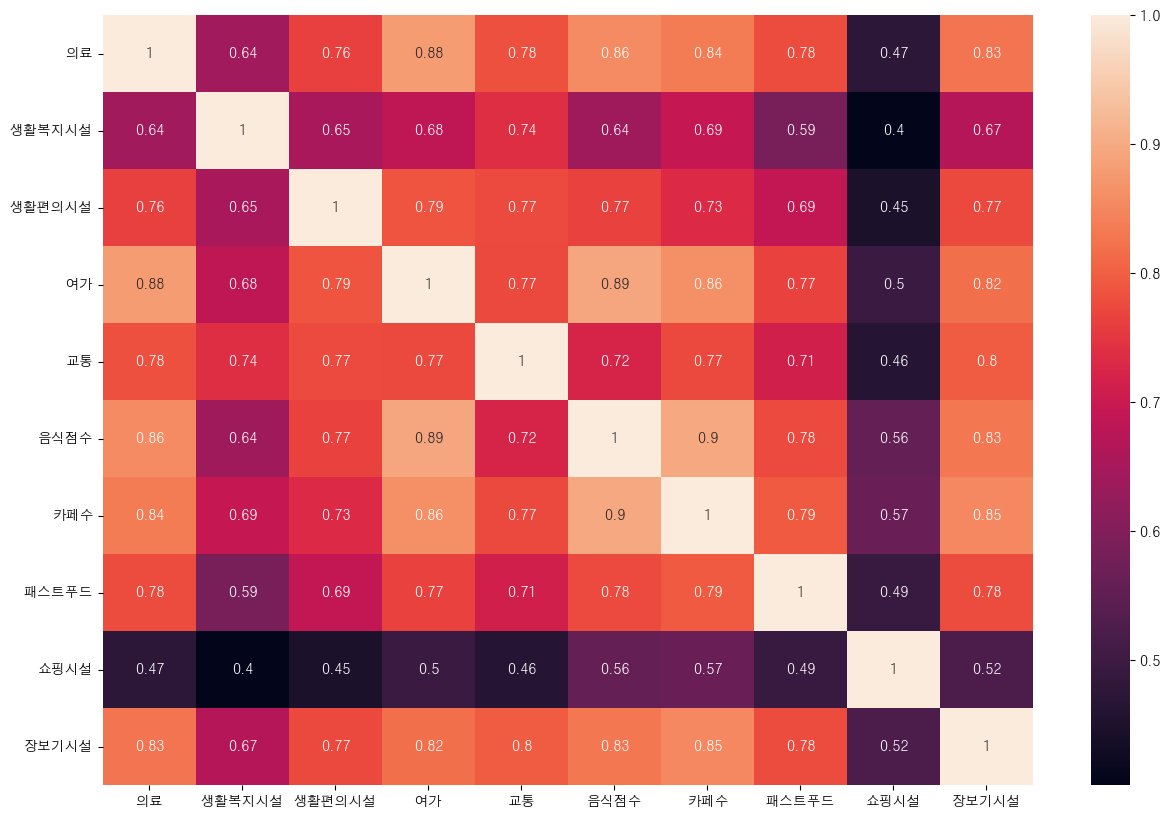

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_3_x, annot=True)

### df_3_x 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled_3_x = StandardScaler().fit_transform(df_3_x)

In [ ]:
pd.DataFrame(data_scaled_3_x).describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.52,-1.12,-1.38,-1.63,-1.60,-1.58,-1.57,-1.13,-0.97,-1.36
25%,-1.09,-1.12,-0.50,-0.52,-0.74,-0.94,-0.79,-1.13,-0.97,-0.61
50%,0.22,0.15,0.39,0.04,0.12,0.02,-0.01,0.13,-0.97,0.13
75%,0.66,1.42,1.27,0.59,0.99,0.98,0.77,1.40,1.03,0.87
max,1.53,1.42,1.27,1.70,1.56,1.62,1.55,1.40,1.03,1.62


### df_3_x 차원축소

In [ ]:
from sklearn.decomposition import PCA

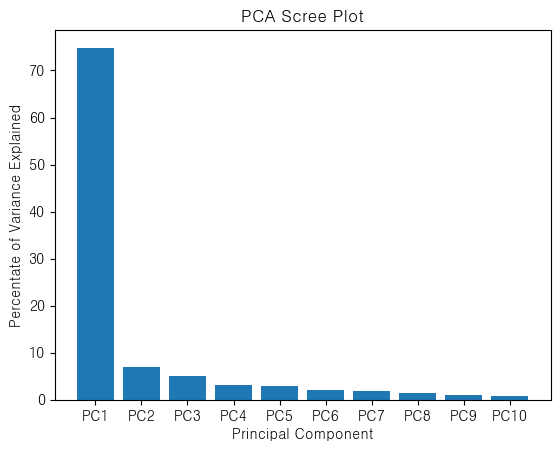

0    0.748405
1    0.817596
2    0.867214
3    0.898679
4    0.927309
5    0.948921
6    0.967473
7    0.981695
8    0.991927
9    1.000000
dtype: float64

In [ ]:
# PCA 주성분분석
pca_test = PCA(random_state=1107)
X_p = pca_test.fit_transform(data_scaled_3_x)


percent_variance = np.round(pca_test.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
pd.Series(np.cumsum(pca_test.explained_variance_ratio_))

In [ ]:
pca_3_x = PCA(n_components=6)
pc_3_x = pca_3_x.fit_transform(data_scaled_3_x)

In [ ]:
pcd_3_x = pd.DataFrame(pc_3_x)
pcd_3_x

,0,1,2,3,4,5
0,-2.650329,1.388512,-1.706459,0.439017,-0.290767,0.348880
1,-3.200565,-0.543916,-0.781466,-0.025503,0.143560,-0.656578
2,-3.970756,-0.331001,-1.068677,0.577164,-0.159227,-0.403004
3,-3.170465,1.804309,-0.475967,-0.008497,-0.286641,0.406822
4,-3.259911,1.714754,-0.363999,-0.103764,-0.138691,0.335742
...,...,...,...,...,...,...
460,2.780194,0.110465,-0.984131,-0.391585,0.520587,-0.076631
461,3.720713,0.170902,-0.231157,0.153654,-0.169867,-0.413612
462,4.589772,0.034259,0.015264,0.221203,0.172985,-0.033450
463,4.400831,0.081036,-0.082161,0.198632,-0.021960,-0.012334


In [ ]:
pcd_3_x.sort_values(1, ascending=False), pcd_3_x.sort_values(0, ascending=False)

(            0         1         2         3         4         5
 143 -3.021979  1.908561 -0.117421  0.065998  0.012770  0.201945
 135 -2.479153  1.886639  0.221816  0.561594 -0.884232 -0.173899
 21  -0.947274  1.857692  1.349255  1.089772  0.484932 -0.157491
 11  -2.015401  1.854593  0.449153  0.416301  0.807294  0.280540
 8   -3.777670  1.836140 -0.535082 -0.145807 -0.199605 -0.089735
 ..        ...       ...       ...       ...       ...       ...
 286  2.634637 -1.713957 -0.290237  0.099648 -0.696591 -0.430434
 235  3.319360 -1.743063  0.132797  0.310479 -0.150688 -0.375760
 225  2.590050 -1.762621 -0.281736 -0.117939  0.704335 -0.011677
 239  1.306677 -1.774061 -0.978932 -0.493787 -0.045281 -0.277034
 365  3.807073 -1.863491  0.206319  0.212376 -0.290695  0.139573
 
 [465 rows x 6 columns],
             0         1         2         3         4         5
 336  4.681940 -0.019510 -0.073042  0.149561  0.071459  0.129294
 297  4.681940 -0.019510 -0.073042  0.149561  0.071459  0.12929

### df_3_x 시각화

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


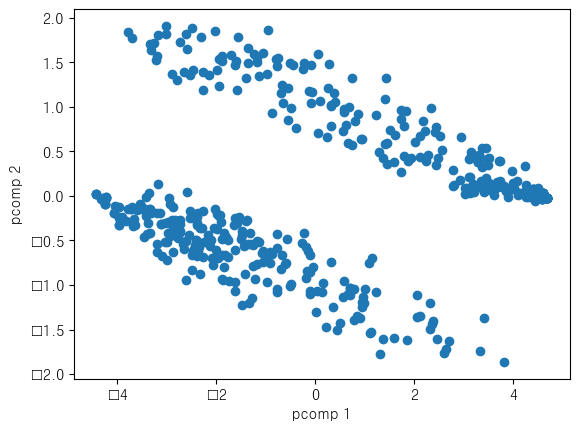

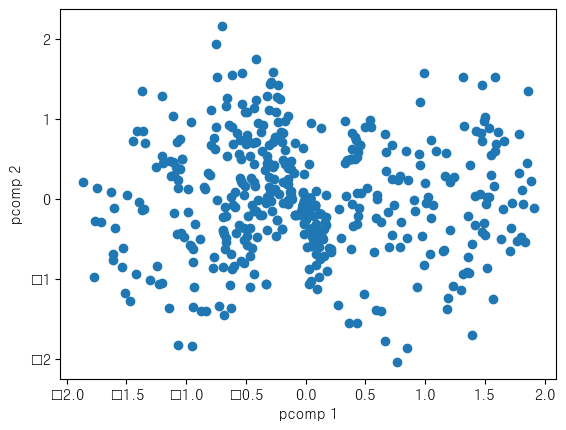

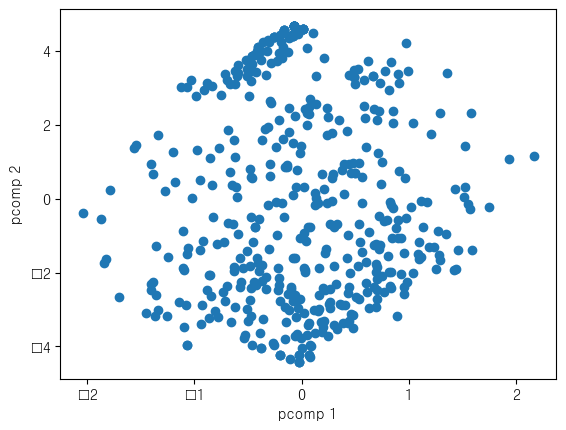

In [ ]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[0],pcd_3_x[1],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[2],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

plt.figure()
plt.scatter(pcd_3_x[2],pcd_3_x[0],)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

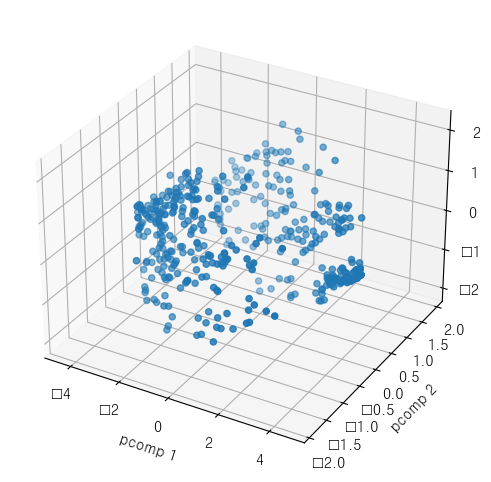

In [ ]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_3_x[0],pcd_3_x[1],pcd_3_x[2])

### 군집 분석 검증을 위해 데이터 값을 인덱스해서 넣어봄

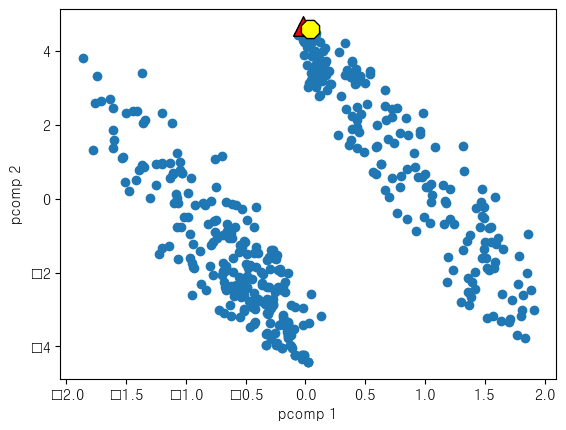

In [ ]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0],)
plt.scatter(pcd_3_x[1][231],pcd_3_x[0][231], c='red', marker="^" , s=200, edgecolors="black")
plt.scatter(pcd_3_x[1][435],pcd_3_x[0][435], c='yellow', marker="8" , s=200, edgecolors="black")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

# 231, 435는 비슷한 두 데이터

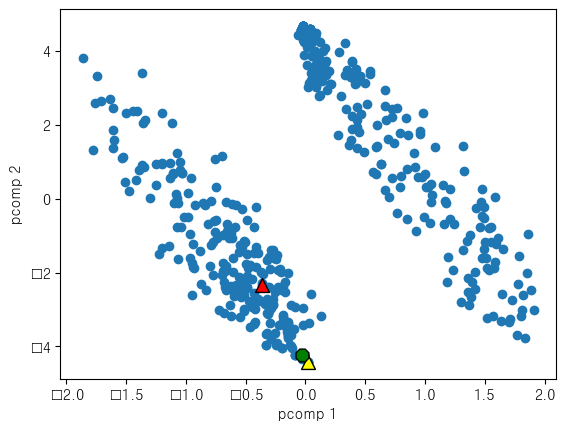

In [ ]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0],)
plt.scatter(pcd_3_x[1][254],pcd_3_x[0][254], c='red', marker="^" , s=100, edgecolors="black")

plt.scatter(pcd_3_x[1][49],pcd_3_x[0][49], c='yellow', marker="^" , s=100, edgecolors="black")
plt.scatter(pcd_3_x[1][158],pcd_3_x[0][158], c='green', marker="8" , s=100, edgecolors="black")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

# 49, 158 비슷한 데이터 / 254 는 다른 분포의 데이터

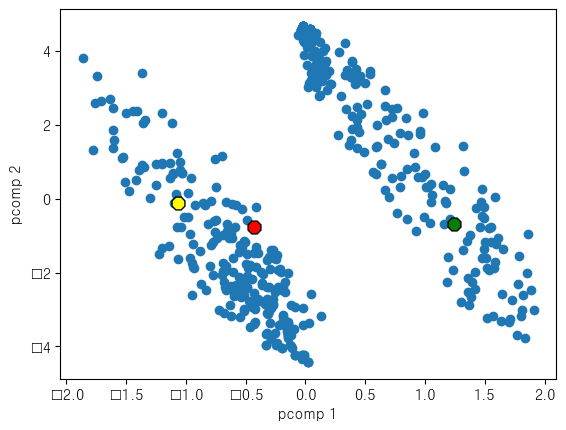

In [ ]:
from turtle import shape


plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0],)
plt.scatter(pcd_3_x[1][100],pcd_3_x[0][100], c='red', marker="8" , s=100, edgecolors="black")
plt.scatter(pcd_3_x[1][200],pcd_3_x[0][200], c='yellow', marker="8" , s=100, edgecolors="black")
plt.scatter(pcd_3_x[1][300],pcd_3_x[0][300], c='green', marker="8" , s=100, edgecolors="black")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

# 임의의 숫자를 넣어봄

## K-means

### df_3_x

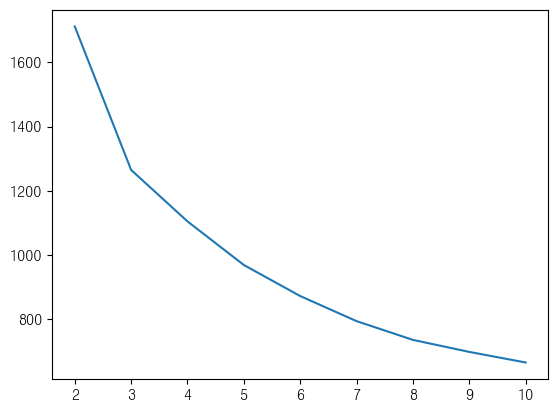

In [ ]:
from sklearn.cluster import KMeans
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc_3_x)

In [ ]:
from sklearn.cluster import KMeans
km_3_x = KMeans(n_clusters=7, random_state=5)

# 엘보 포인트가 8인거같은데 시각적으로 7이 더 깔끔하게 군집 나뉘어보임

In [ ]:
km_3_x.fit_transform(pc_3_x)
km_3_x.labels_

array([0, 6, 6, 0, 0, 3, 4, 0, 0, 6, 0, 3, 0, 4, 4, 6, 3, 4, 3, 4, 4, 3,
       3, 4, 6, 3, 0, 3, 4, 4, 6, 6, 6, 0, 2, 4, 4, 3, 6, 3, 4, 4, 6, 0,
       6, 4, 3, 3, 6, 6, 4, 6, 4, 0, 3, 4, 4, 0, 4, 6, 4, 4, 3, 3, 6, 2,
       0, 3, 5, 4, 3, 3, 4, 5, 1, 4, 4, 6, 6, 6, 6, 4, 5, 5, 3, 4, 4, 4,
       4, 3, 4, 2, 6, 6, 6, 6, 6, 3, 2, 4, 4, 0, 4, 6, 2, 6, 0, 3, 4, 6,
       3, 2, 4, 3, 6, 4, 6, 6, 4, 4, 0, 6, 6, 4, 3, 4, 6, 6, 6, 4, 2, 4,
       6, 4, 5, 0, 4, 4, 0, 0, 4, 3, 6, 0, 3, 4, 0, 3, 1, 4, 4, 2, 3, 4,
       3, 6, 6, 5, 6, 6, 4, 5, 5, 6, 5, 4, 6, 5, 2, 6, 5, 3, 2, 4, 6, 6,
       6, 6, 6, 4, 6, 4, 6, 6, 4, 5, 6, 4, 5, 2, 5, 1, 0, 6, 6, 0, 5, 4,
       5, 4, 2, 2, 4, 1, 4, 2, 5, 5, 5, 5, 1, 1, 4, 2, 1, 2, 1, 5, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 5, 4, 2, 3, 4,
       6, 0, 4, 4, 6, 4, 4, 6, 4, 4, 3, 3, 4, 3, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 5, 5, 1, 1, 5, 1, 1, 1, 1, 2, 1, 3,

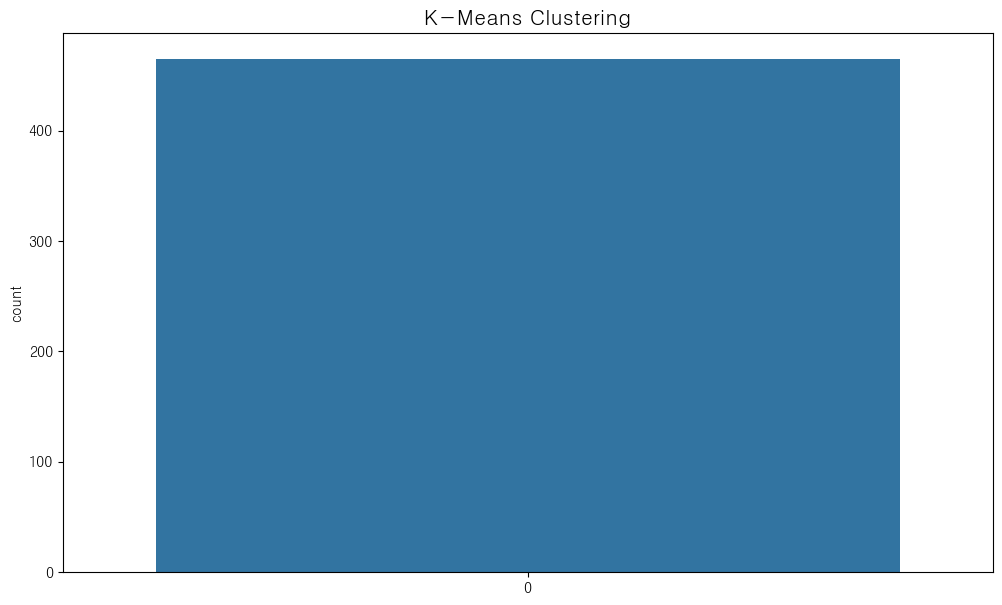

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(km_3_x.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_3_x = silhouette_score(pc_3_x, km_3_x.labels_)
score_3_x

0.31522003492257494

In [ ]:
pcd_3_x = pd.DataFrame(pc_3_x)
pcd_3_x['cluster_id'] = km_3_x.labels_
pcd_3_x

,0,1,2,3,4,5,cluster_id
0,-2.650329,1.388512,-1.706459,0.439017,-0.290767,0.348880,0
1,-3.200565,-0.543916,-0.781466,-0.025503,0.143560,-0.656578,6
2,-3.970756,-0.331001,-1.068677,0.577164,-0.159227,-0.403004,6
3,-3.170465,1.804309,-0.475967,-0.008497,-0.286641,0.406822,0
4,-3.259911,1.714754,-0.363999,-0.103764,-0.138691,0.335742,0
...,...,...,...,...,...,...,...
460,2.780194,0.110465,-0.984131,-0.391585,0.520587,-0.076631,1
461,3.720713,0.170902,-0.231157,0.153654,-0.169867,-0.413612,1
462,4.589772,0.034259,0.015264,0.221203,0.172985,-0.033450,1
463,4.400831,0.081036,-0.082161,0.198632,-0.021960,-0.012334,1


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


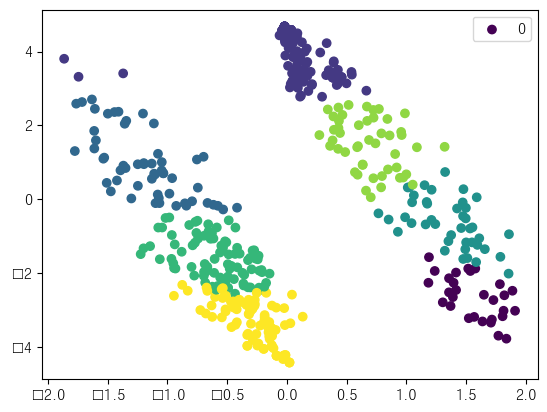

In [ ]:
plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0], c=pcd_3_x['cluster_id'])
plt.legend((pcd_3_x['cluster_id']))
plt.show()

<Figure size 640x480 with 0 Axes>

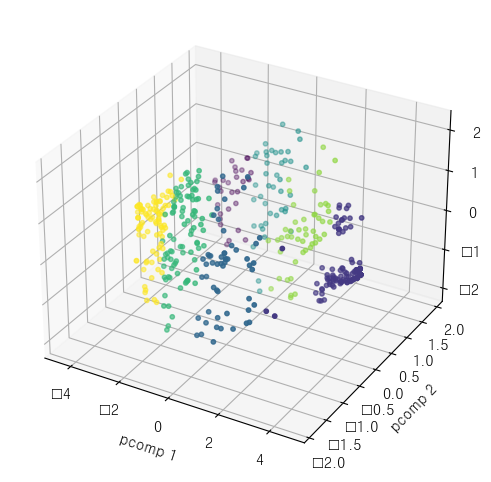

In [ ]:
from turtle import color


plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_3_x[0],pcd_3_x[1],pcd_3_x[2], c=pcd_3_x['cluster_id'] , s=10)

## GMM : Gaussian_

### df_3_x

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components= 7, max_iter=100 ,random_state=0)
gmm.fit(pc_3_x)
gmm_cluster_labels = gmm.predict(pc_3_x)
gmm_cluster_labels

array([6, 4, 4, 6, 6, 5, 3, 6, 6, 3, 5, 5, 6, 3, 2, 3, 5, 3, 5, 2, 4, 5,
       5, 2, 3, 5, 5, 5, 2, 2, 4, 4, 3, 6, 2, 3, 4, 5, 3, 5, 4, 4, 4, 6,
       3, 2, 5, 5, 4, 3, 2, 3, 3, 6, 5, 3, 3, 6, 3, 3, 3, 3, 5, 5, 3, 0,
       6, 5, 5, 4, 5, 5, 2, 5, 1, 3, 4, 3, 3, 4, 3, 2, 5, 5, 5, 4, 3, 3,
       2, 5, 2, 3, 3, 3, 3, 3, 3, 5, 4, 3, 3, 6, 2, 3, 2, 3, 6, 5, 4, 3,
       5, 3, 3, 5, 4, 3, 3, 3, 4, 3, 6, 3, 4, 4, 5, 2, 3, 3, 3, 4, 4, 3,
       3, 3, 5, 6, 3, 4, 5, 6, 3, 5, 3, 6, 5, 3, 6, 5, 1, 3, 4, 3, 5, 4,
       5, 3, 4, 5, 3, 3, 2, 5, 5, 3, 5, 3, 4, 5, 2, 3, 5, 5, 2, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 4, 5, 3, 4, 5, 4, 5, 1, 6, 4, 3, 6, 1, 4,
       1, 4, 4, 0, 2, 1, 4, 0, 5, 5, 5, 5, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1,
       2, 2, 0, 0, 1, 0, 1, 0, 5, 0, 1, 1, 1, 1, 1, 0, 1, 5, 4, 0, 5, 3,
       3, 6, 3, 3, 3, 3, 3, 4, 4, 3, 5, 5, 2, 5, 3, 3, 3, 3, 3, 5, 3, 3,
       4, 3, 3, 3, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5,

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


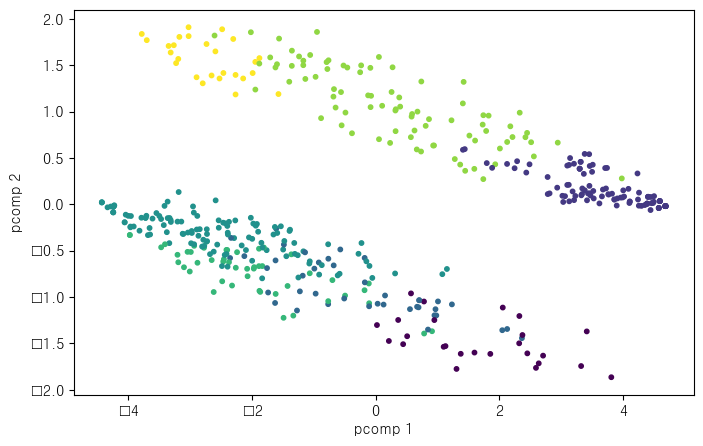

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(pc_3_x[:,0],pc_3_x[:,1] , c=gmm_cluster_labels , s=10)
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')

plt.show()

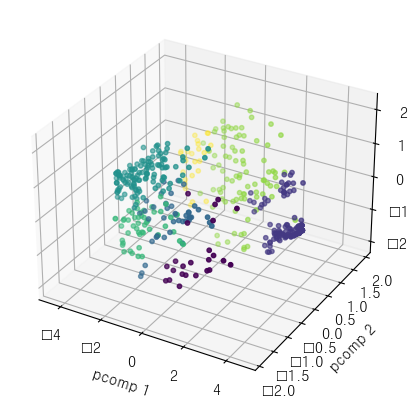

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_3_x[:,0],pc_3_x[:,1],pc_3_x[:,2] , c=gmm_cluster_labels , s=10)
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

In [ ]:
score = silhouette_score(pc_3_x, gmm_cluster_labels)
score

0.23069681790757862

In [ ]:
# 실루엣 스코어 값이 잘 나오지 않지만, 군집화는 잘 된걸로 보인다.

## DBSCAN

### df_3_x

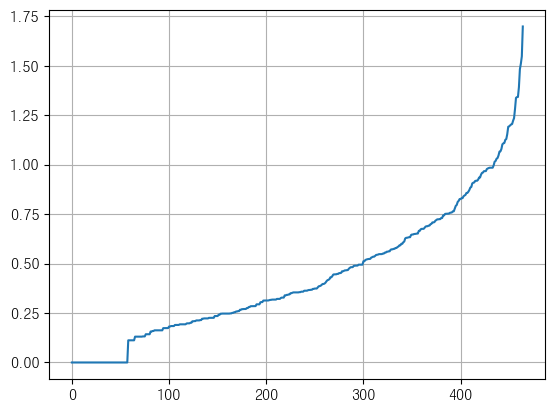

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pc_3_x)
distances, indices = neighbors_fit.kneighbors(pc_3_x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()

학습하기

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan = DBSCAN(eps=1.2, min_samples=5)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(pc_3_x)

dbscan_data
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
display(db_pred.value_counts(), silhouette_score(pc_3_x, dbscan_data))

dbscan2_label
 0               205
 2               169
-1                35
 1                24
 5                12
 6                 8
 3                 7
 4                 5
dtype: int64

0.0479290348538372

In [ ]:
pcd_3_x['cluster_id'] = db_pred
pcd_3_x

,0,1,2,3,4,5,cluster_id
0,-2.650329,1.388512,-1.706459,0.439017,-0.290767,0.348880,-1
1,-3.200565,-0.543916,-0.781466,-0.025503,0.143560,-0.656578,0
2,-3.970756,-0.331001,-1.068677,0.577164,-0.159227,-0.403004,0
3,-3.170465,1.804309,-0.475967,-0.008497,-0.286641,0.406822,1
4,-3.259911,1.714754,-0.363999,-0.103764,-0.138691,0.335742,1
...,...,...,...,...,...,...,...
460,2.780194,0.110465,-0.984131,-0.391585,0.520587,-0.076631,2
461,3.720713,0.170902,-0.231157,0.153654,-0.169867,-0.413612,2
462,4.589772,0.034259,0.015264,0.221203,0.172985,-0.033450,2
463,4.400831,0.081036,-0.082161,0.198632,-0.021960,-0.012334,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


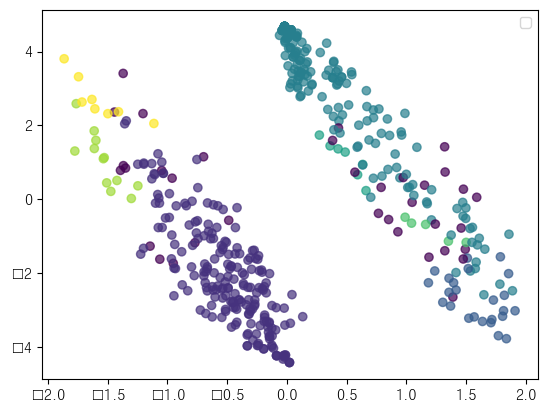

In [ ]:
plt.figure()
plt.scatter(pcd_3_x[1],pcd_3_x[0], c=pcd_3_x['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

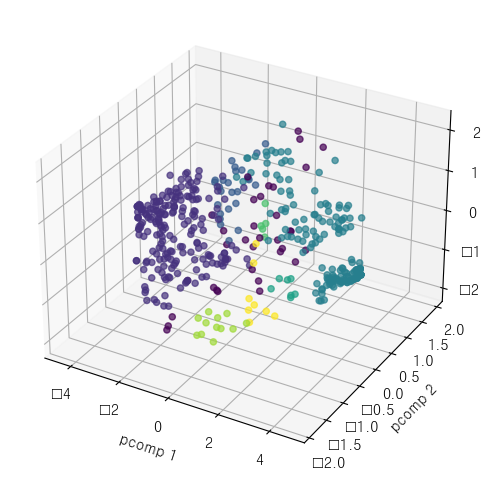

In [ ]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd_3_x[0],pcd_3_x[1],pcd_3_x[2], c=pcd_3_x['cluster_id'], alpha=0.7)

## 학습시키기(KNN)

### df_3_x

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcd_3_x.drop('cluster_id',axis=1), pcd_3_x.drop([0,1,2],axis=1), random_state=30)
X_train.shape, X_test.shape

In [ ]:
np.array(y_train).reshape(1, -1).round(2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

In [ ]:
(pred == np.array(y_test).reshape(1, -1)).mean()

In [ ]:
knn.score(X_test, y_test)

### df_2_x

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(pcd_2_x.drop('cluster_id',axis=1), pcd_2_x.drop([0,1,2],axis=1), random_state=30)
# X_train.shape, X_test.shape

((348, 3), (117, 3))

In [ ]:
# np.array(y_train).reshape(1, -1).round(2)

array([[ 1,  1,  1,  1,  0,  2,  1,  0,  1,  1,  3,  2,  3,  1,  1,  1,
         2,  1,  0,  1,  1,  0,  1,  1,  1,  1,  2,  3,  1,  1,  2,  1,
         1,  1,  1,  2,  0,  0,  3,  0,  1,  1,  1,  3,  1,  0,  0,  1,
         1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  2,  1,  3,  0,
         1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  2,  2,  0,  1,  1,
         1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,
         1,  1,  0,  1,  3,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,
         1,  1,  1,  0,  1,  2,  1,  0,  1,  1,  0,  0,  3,  3,  1,  1,
         0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  3,  3,  1,
         1,  1,  2,  1,  3,  1,  1,  2,  1,  0,  1,  0,  1,  1,  1,  1,
         1,  0,  1,  0,  3,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1,
         1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,
         1,  1,  1,  0,  1,  0,  1,  1,  3,  1,  0,  1,  0,  2,  1,  0,
         1,  1,  3,  0,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1, 

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# pred = knn.predict(X_test)
# pred

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 1, 3, 1, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 0,
       0, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       3, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 3,
       1, 0, 2, 3, 0, 1, 3, 1, 1, 2, 3, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [ ]:
# (pred == np.array(y_test).reshape(1, -1)).mean()

0.9829059829059829

In [ ]:
# knn.score(X_test, y_test)

0.9829059829059829

## Model Test

In [ ]:
# import random

# # 랜덤으로 숫자생성해봄
# test_att = []
# for i in range(1,6):
#     test_att.append(random.randint(0, 3))
# for i in range(1,3):
#     test_att.append(random.randint(0,1))

# # 데이터프레임화 시켜줌
# test_attr_array = np.array(test_att)
# test_data = pd.DataFrame(test_attr_array).transpose()

# # 정규화
# Scaling_tool = StandardScaler()
# Scaling_tool.fit(df_3_x)
# test_scaled = Scaling_tool.transform(test_data)

# # 차원축소
# pca_tool = PCA(n_components=3)
# pca_tool.fit(data_scaled_3_x)
# test_pca = pca_tool.transform(test_scaled)
# knn.predict(test_pca)